# Plot from the server

In [8]:
%load_ext autoreload
%autoreload 2

import sys
if '..' not in sys.path:
    sys.path.append('..')


import pandas as pd
import numpy as np
import networkx as nx
import copy
import scipy as sp
import math
import seaborn
import pickle
import warnings
import matplotlib
import re
import multiprocessing

from lib.mobilitysim import MobilitySimulator
from lib.dynamics import DiseaseModel
from lib.inference import * 
from bayes_opt import BayesianOptimization
from lib.parallel import *
from lib.distributions import CovidDistributions
from lib.plot import Plotter
from lib.data import collect_data_from_df
from lib.measures import (
    MeasureList, 
    BetaMultiplierMeasure, 
    BetaMultiplierMeasureByType,
    SocialDistancingForAllMeasure, 
    SocialDistancingForKGroups,
    SocialDistancingByAgeMeasure,
    SocialDistancingForPositiveMeasure, 
    ComplianceForAllMeasure,
    Interval,
    ComplianceForEssentialWorkers,
    SocialDistancingForNonEssential)

from lib.mobilitysim import MobilitySimulator
from lib.town_data_specify_essential_prop import generate_population, generate_sites, compute_distances
from lib.town_maps import MapIllustrator


def save_summary(summary, filename):
    with open('summaries/' + filename, 'wb') as fp:
        pickle.dump(summary, fp)
    
def load_summary(filename):
    with open('summaries/' + filename, 'rb') as fp:
        summary = pickle.load(fp)
    return summary


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 

## supermarket essential workers vs. random individuals

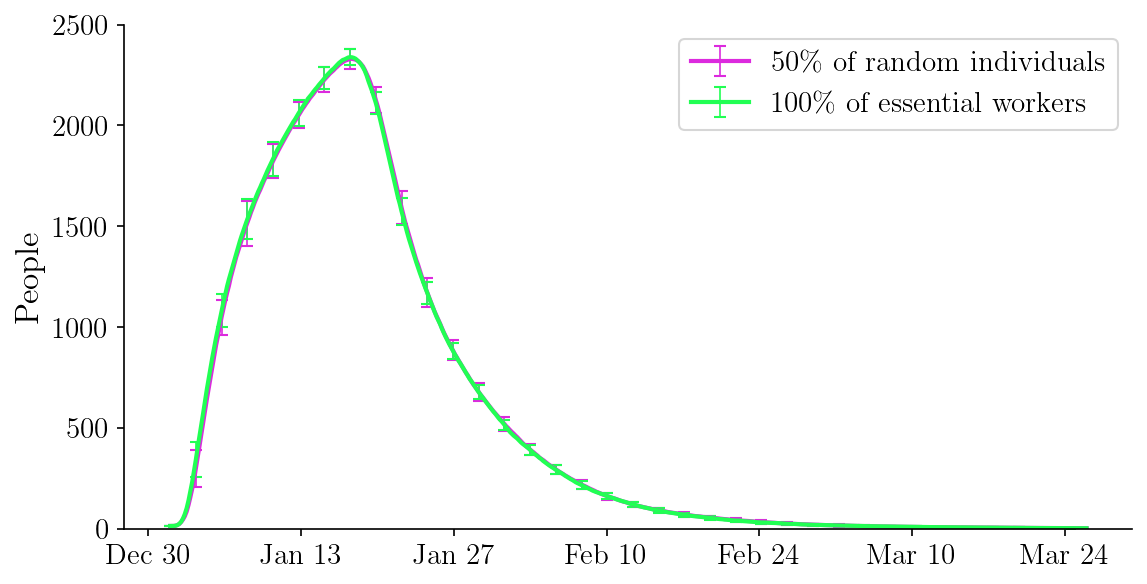

In [16]:
# downsized 20 by pop, 10 by town, 20 random repeats
# 50.13% essential to total prop, essential: 2270, non-essential: 2258, total: 4528, sites:95
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for supermarket, 50% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats20_supermarket_settings_20_10.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

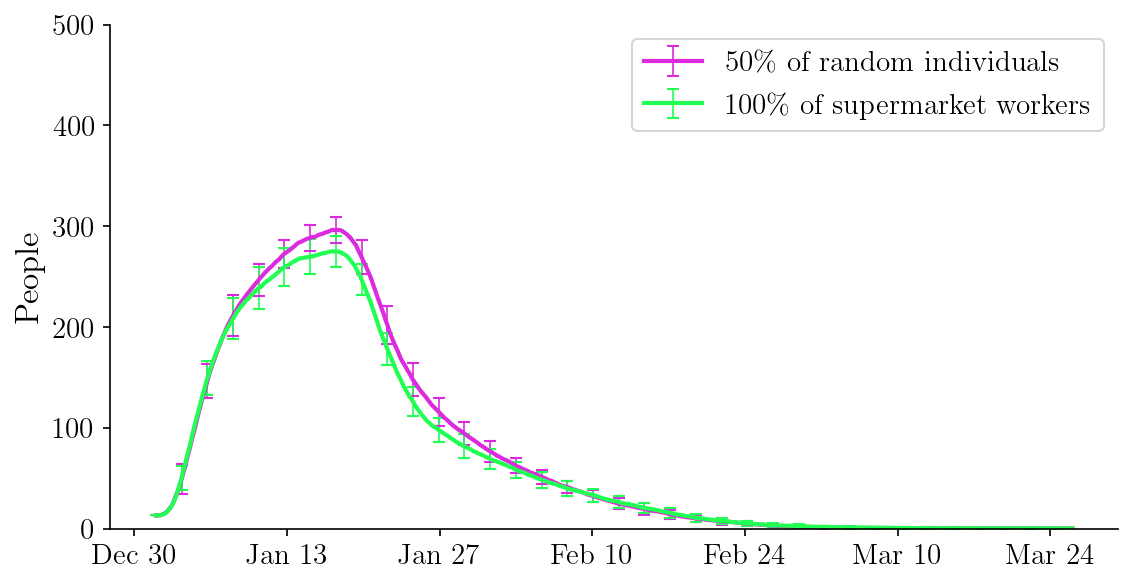

In [28]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for supermarket, 50% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats40_supermarket_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

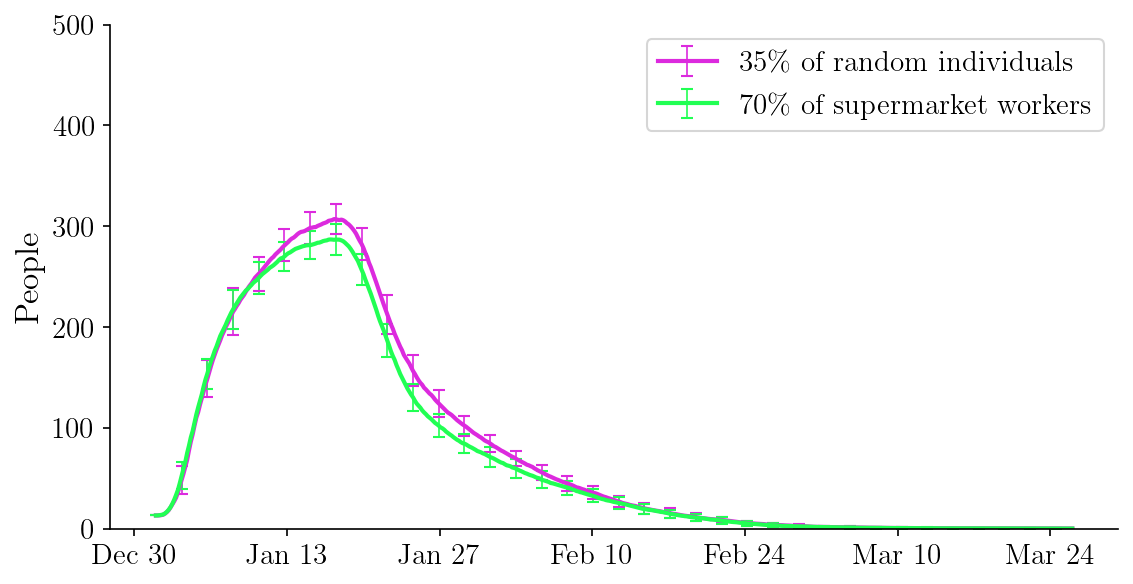

In [29]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 70% compliance for supermarket, 35% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.7_repeats40_supermarket_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['35\% of random individuals','70\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

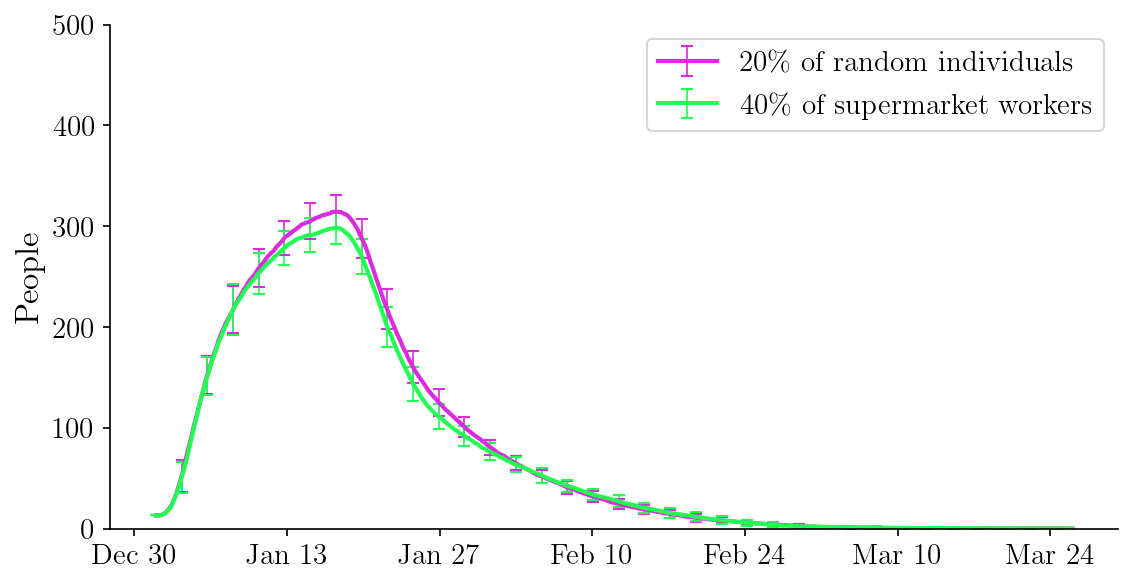

In [30]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 40% compliance for supermarket, 20% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.4_repeats40_supermarket_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['20\% of random individuals','40\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

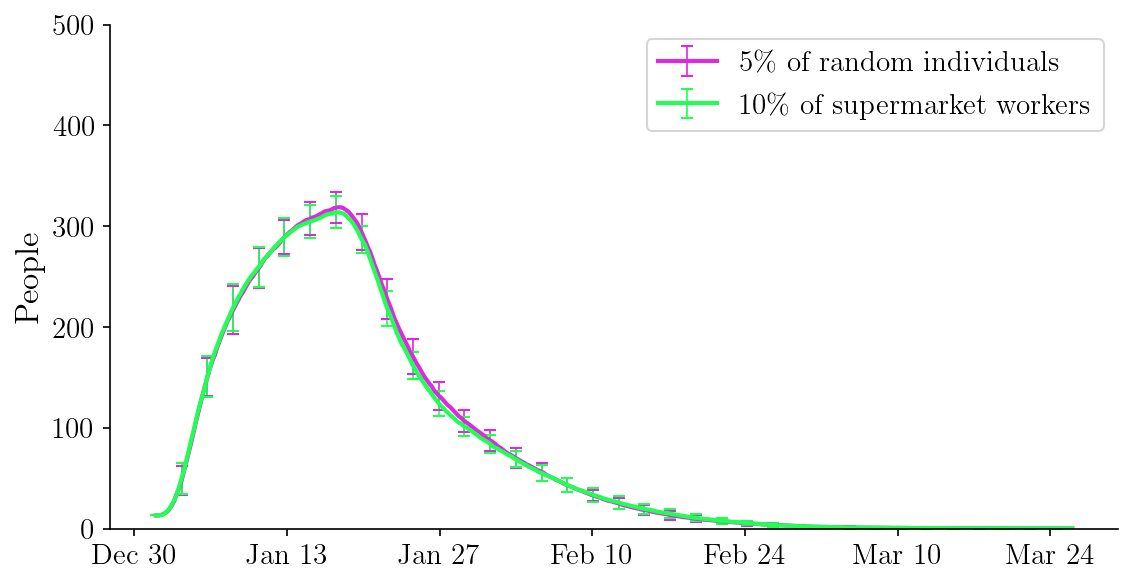

In [31]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for supermarket, 5% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.1_repeats40_supermarket_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','10\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

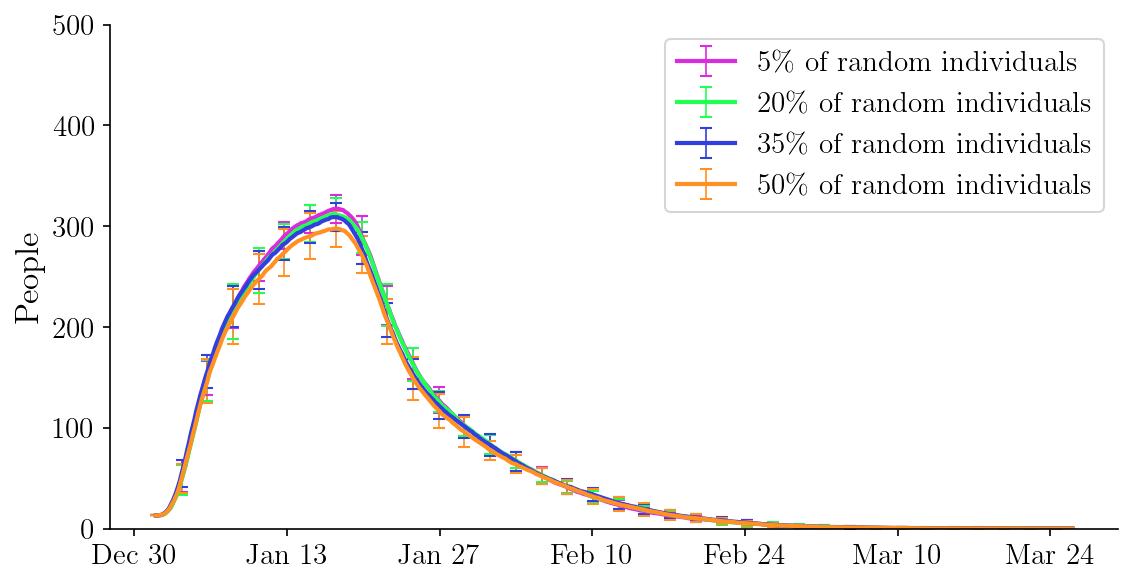

In [27]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare random complaince rates, 5%, 20%, 35%, 50%
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyall_comp0.1-0.4-0.7-1_repeats40_supermarket_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','20\% of random individuals','35\% of random individuals','50\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

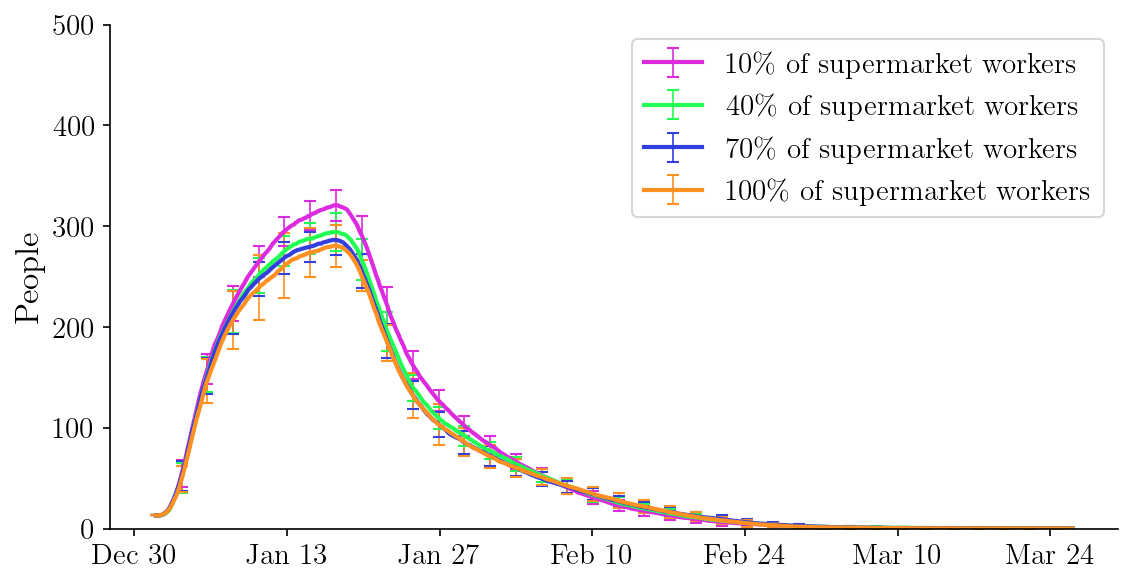

In [68]:
#### downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyessential_comp0.1-0.4-0.7-1_repeats40_supermarket_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['10\% of supermarket workers','40\% of supermarket workers','70\% of supermarket workers','100\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

### case 2: downsized by 20-5

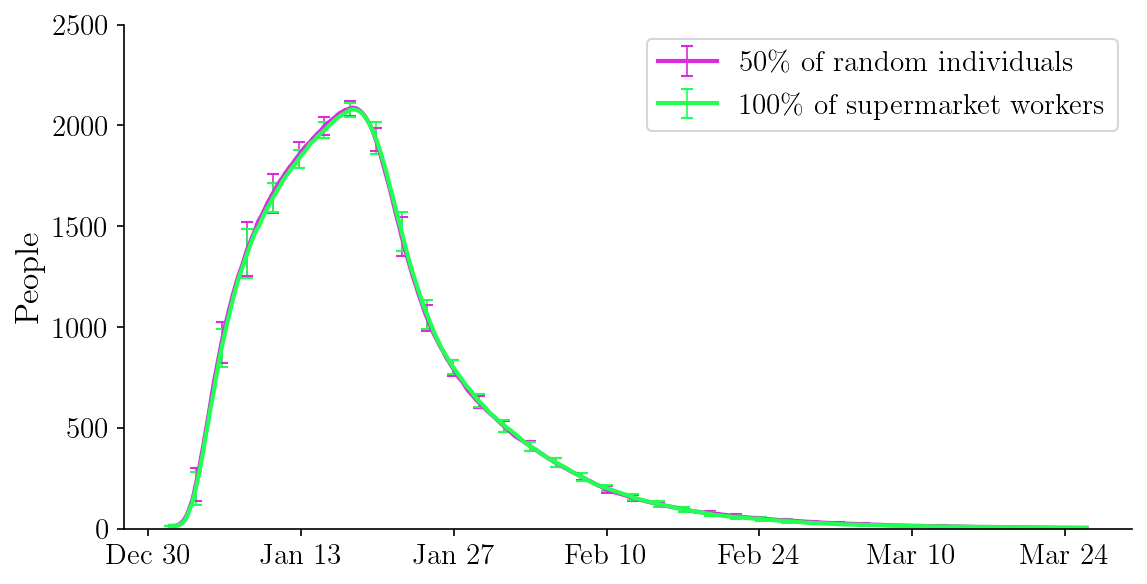

In [69]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for supermarket, 50% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats10_supermarket_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

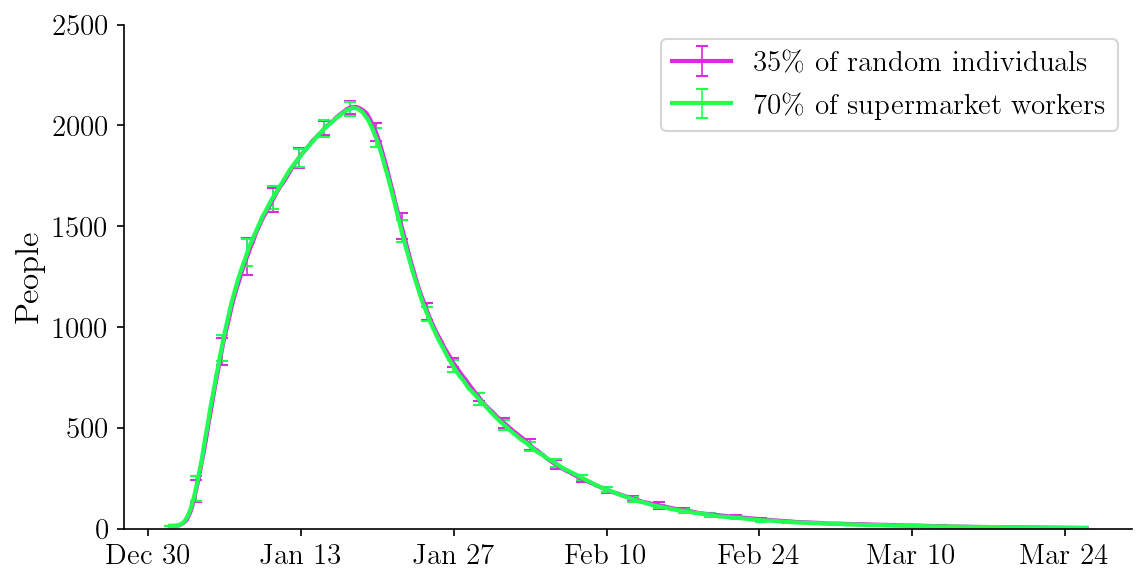

In [5]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 70% compliance for supermarket, 35% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.7_repeats10_supermarket_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['35\% of random individuals','70\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

In [4]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 40% compliance for supermarket, 20% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.4_repeats10_supermarket_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['20\% of random individuals','40\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

UnpicklingError: pickle data was truncated

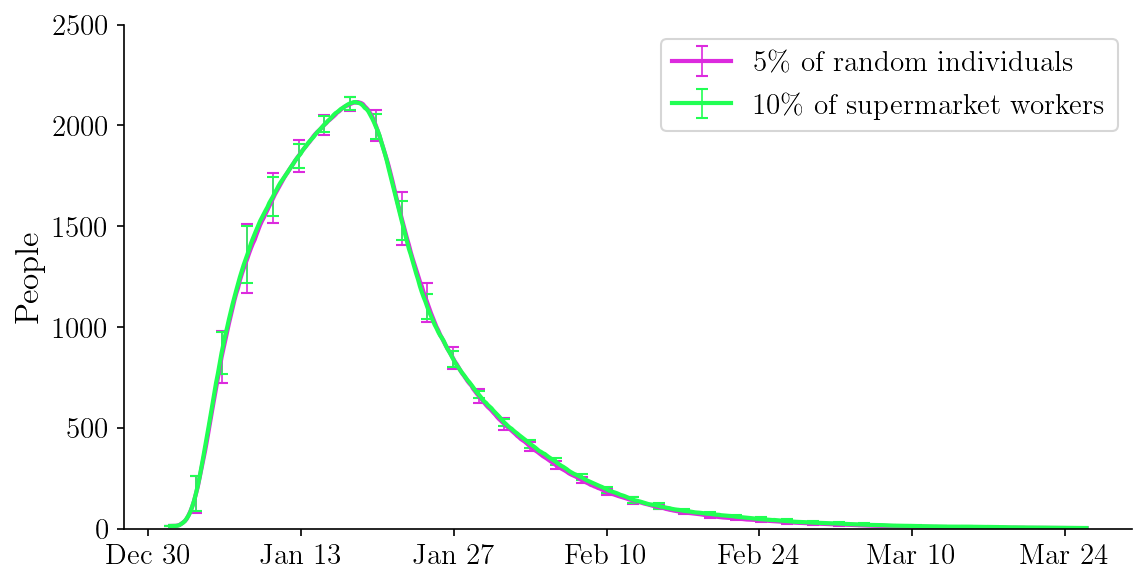

In [6]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare supermarket workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for supermarket, 5% for random individual
# mob rate regular: same as German town
# mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,0,7],essential_dur_mean_per_type = [0,0,0,0,8]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.1_repeats10_supermarket_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','10\% of supermarket workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

### 

## office essential workers vs. random individuals

### case 1: downsized by 100-20

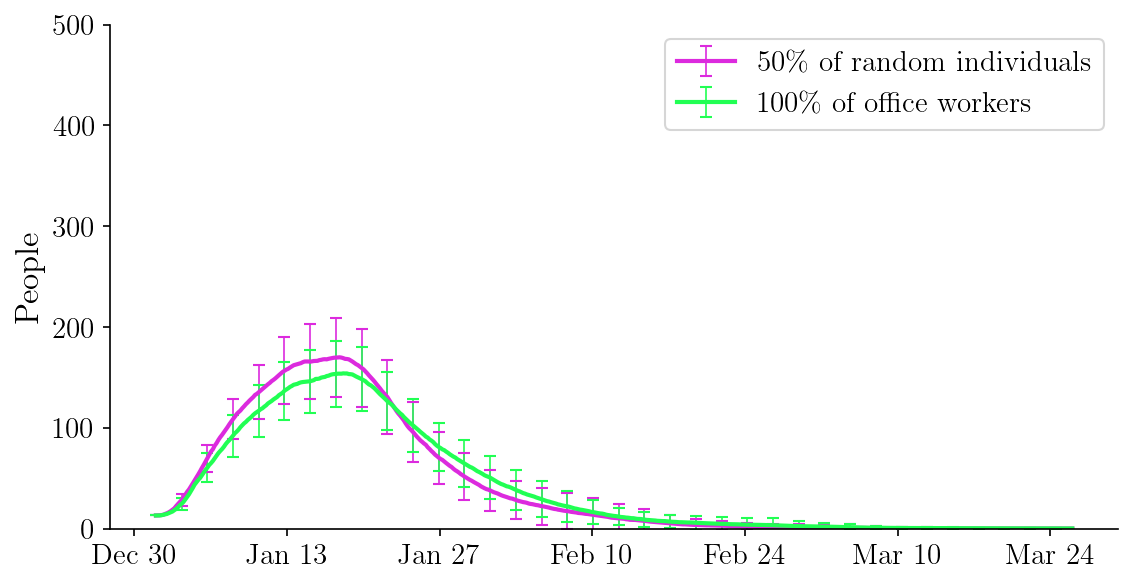

In [42]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare office workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for office, 50% for random individual
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats40_office_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of office workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

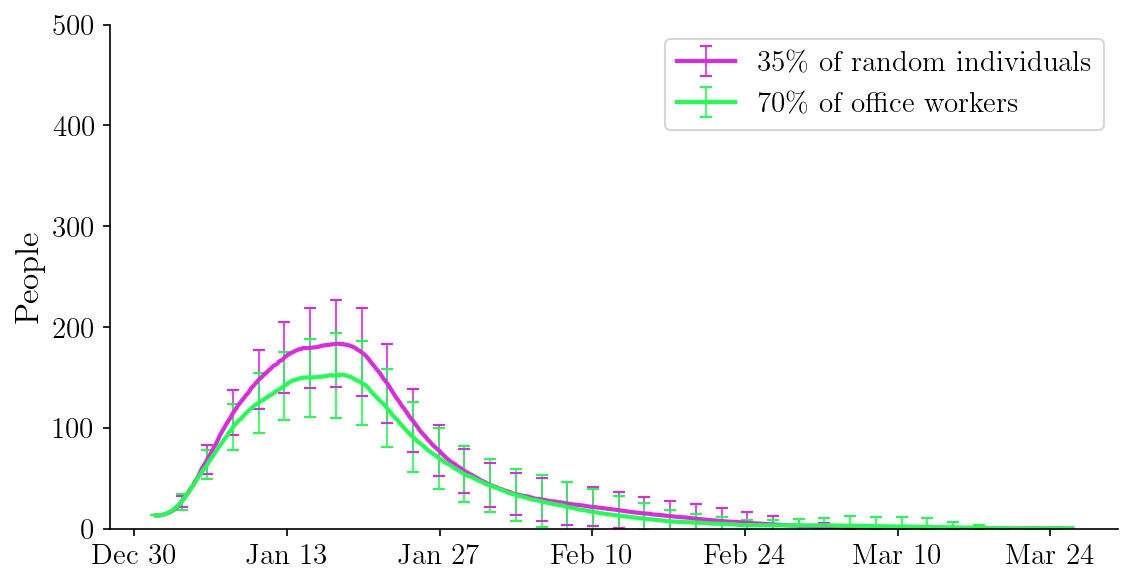

In [43]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare office workers compliant vs. random complaint, number of compliant ~=
# compare 70% compliance for office, 35% for random individual
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.7_repeats40_office_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['35\% of random individuals','70\% of office workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

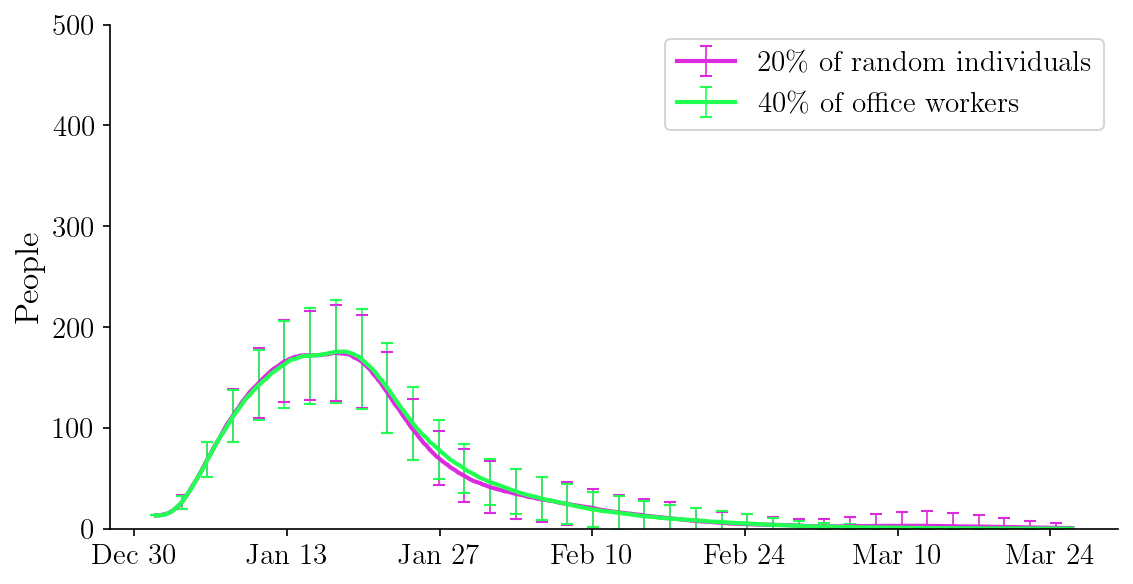

In [44]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare office workers compliant vs. random complaint, number of compliant ~=
# compare 40% compliance for office, 20% for random individual
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.4_repeats40_office_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['20\% of random individuals','40\% of office workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

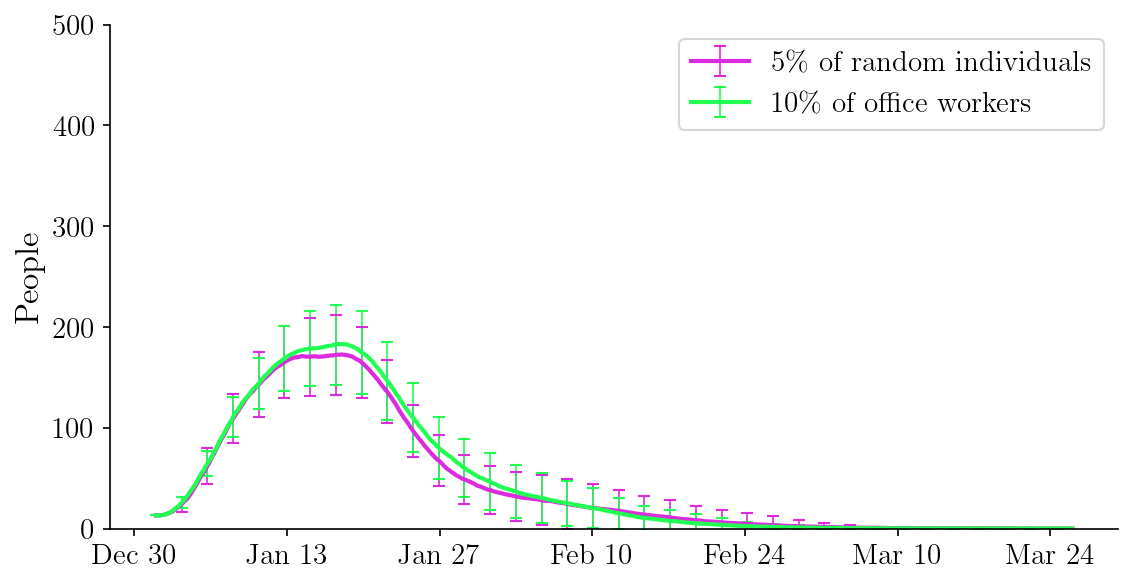

In [45]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare office workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for office, 5% for random individual
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.1_repeats40_office_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','10\% of office workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

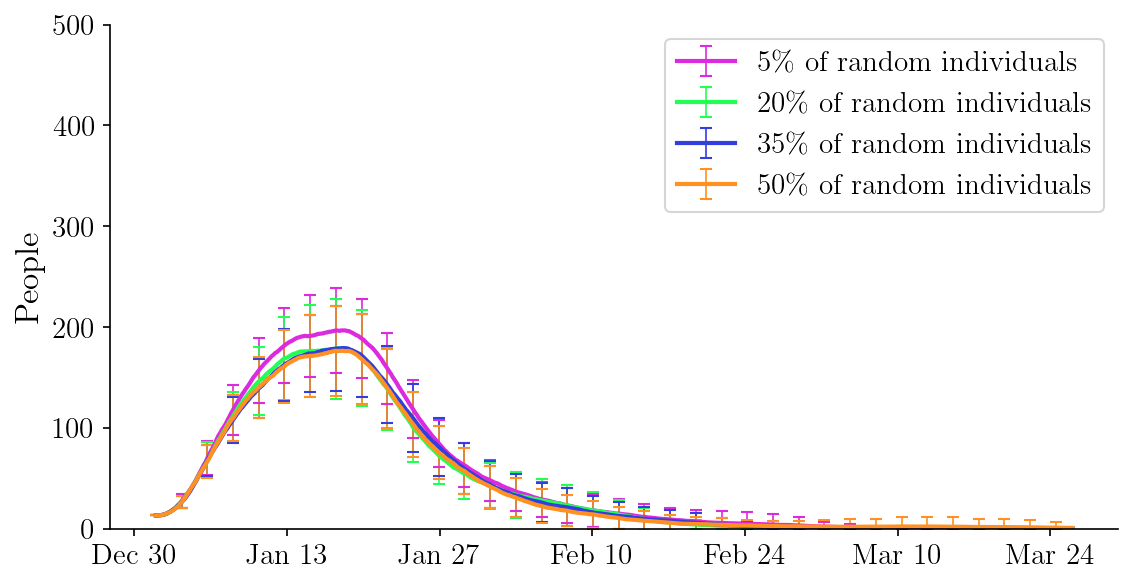

In [40]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyall_comp0.1-0.4-0.7-1_repeats40_office_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','20\% of random individuals','35\% of random individuals','50\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

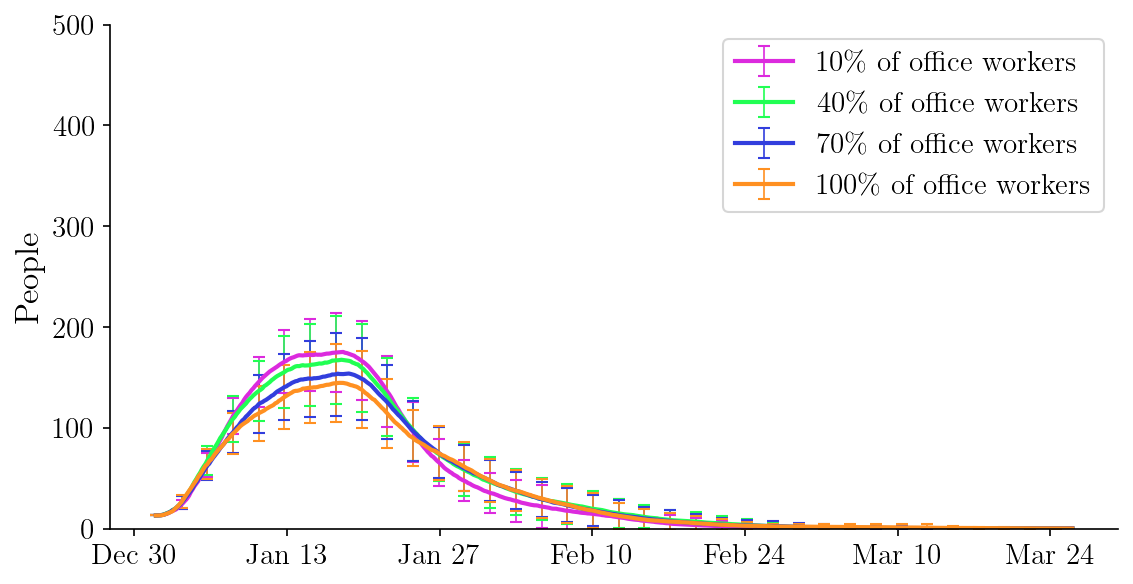

In [39]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyessential_comp0.1-0.4-0.7-1_repeats40_office_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['10\% of office workers','40\% of office workers','70\% of office workers','100\% of office workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

### case 2: downsized by 20-5

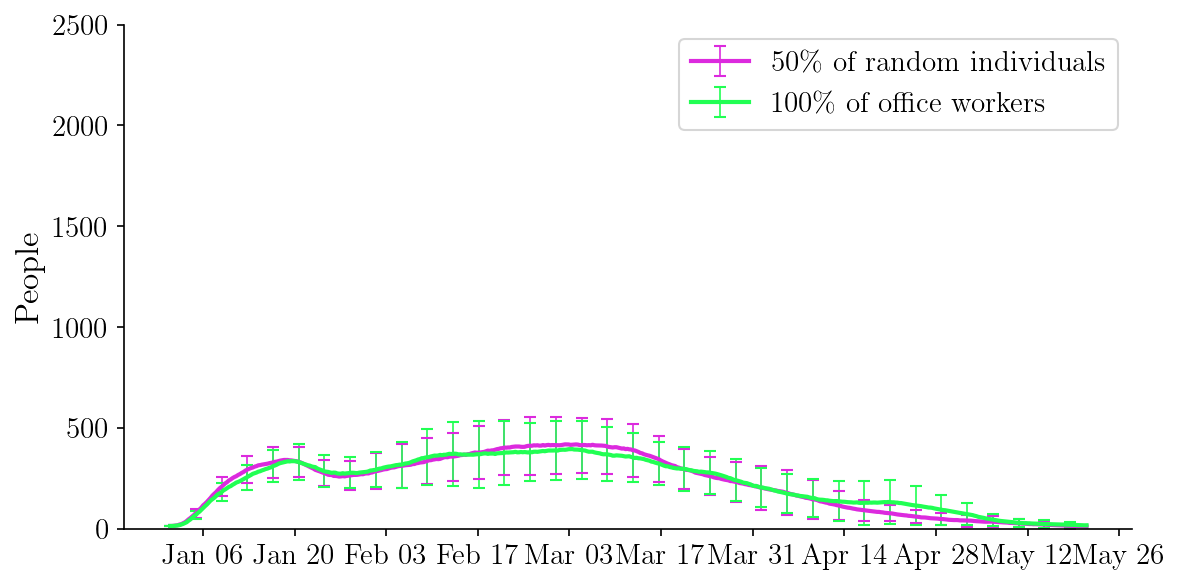

In [16]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare office workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for office, 50% for random individual
# mob rate regular: same as German town
# mob rate office: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,0,7,0],essential_dur_mean_per_type = [0,0,0,8,0]
# mob rate zero elsewhere

### TO DO: 1. reproduce the town data, make sure its correct. 2. extend simulation time from 12 to 20 weeks

summaries_SD_6 = load_summary('comp1.0_repeats10_20weeks_office_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of office workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

### 

## transportation essential workers vs. random individuals

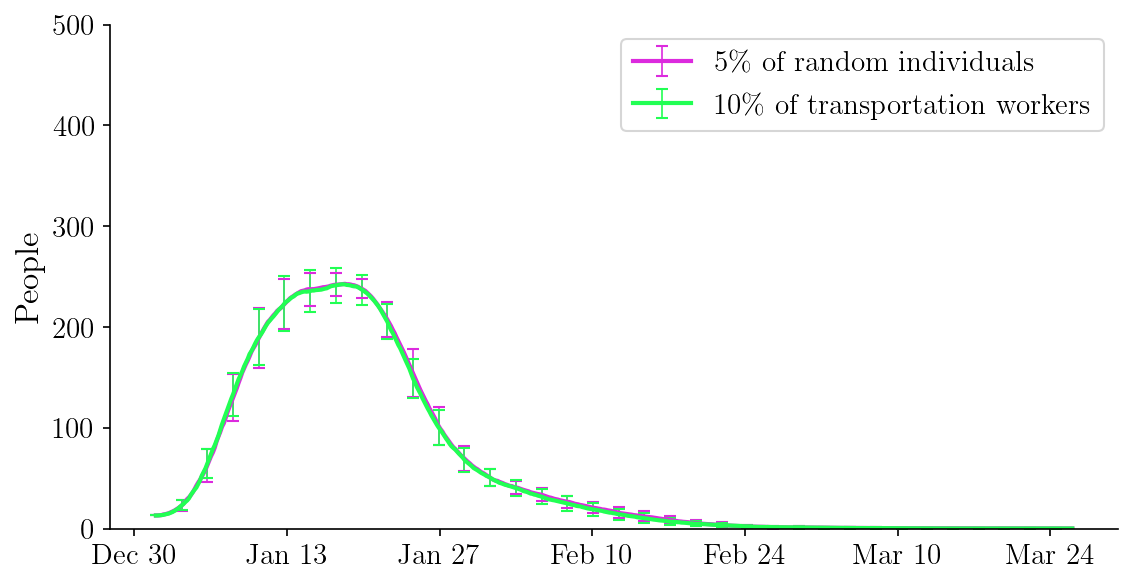

In [46]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare trans workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for trans, 5% for random individual
# mob rate regular: same as German town
# mob rate trans: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.1_repeats40_bus_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','10\% of transportation workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

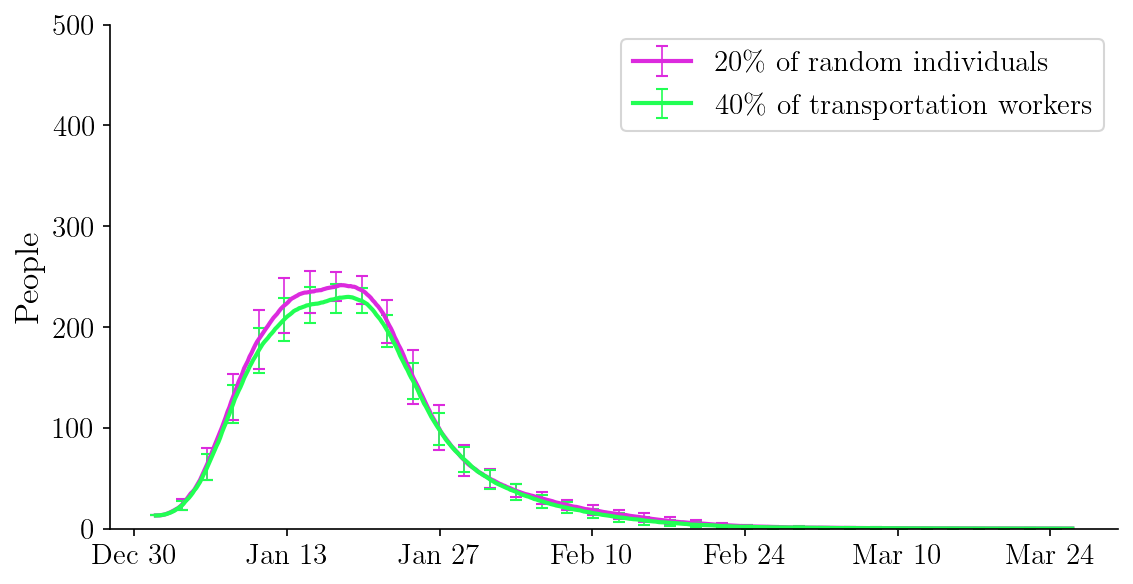

In [47]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare trans workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for trans, 5% for random individual
# mob rate regular: same as German town
# mob rate trans: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.4_repeats40_bus_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['20\% of random individuals','40\% of transportation workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

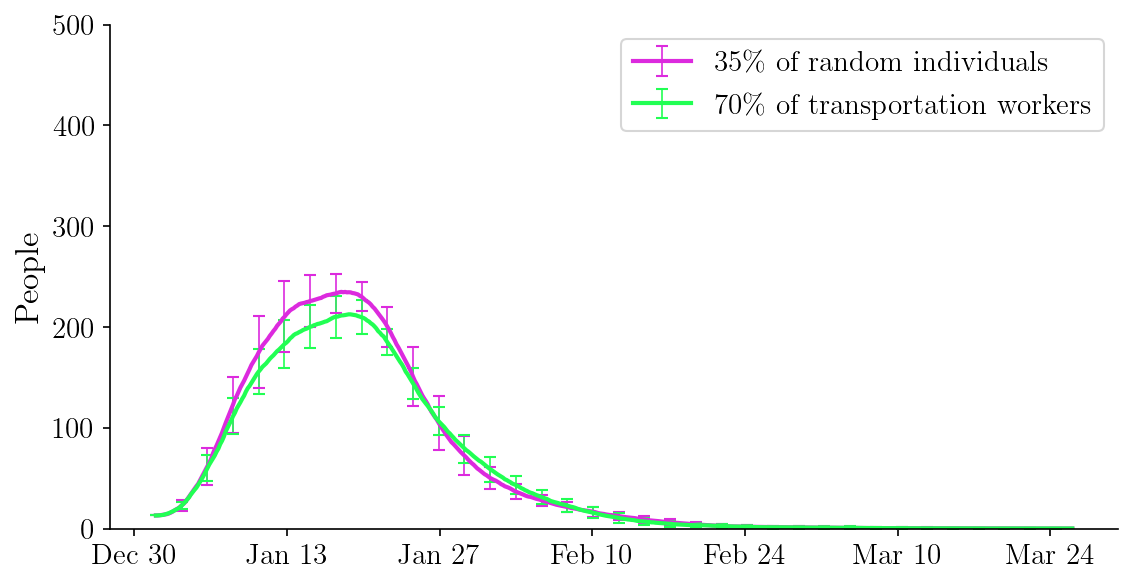

In [48]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare trans workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for trans, 5% for random individual
# mob rate regular: same as German town
# mob rate trans: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.7_repeats40_bus_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['35\% of random individuals','70\% of transportation workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

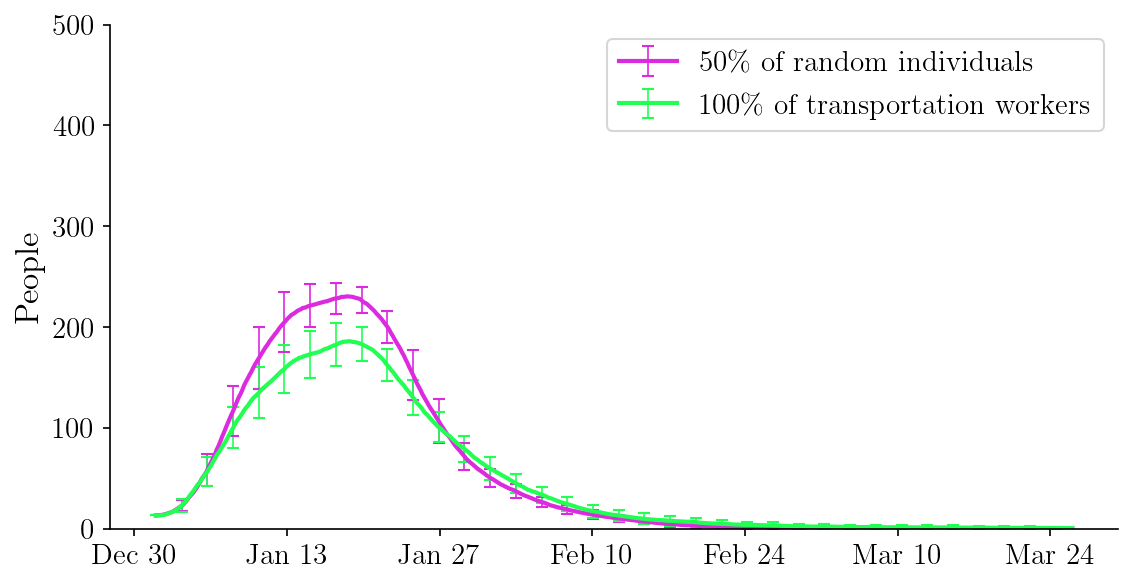

In [49]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare trans workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for trans, 5% for random individual
# mob rate regular: same as German town
# mob rate trans: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats40_bus_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of transportation workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

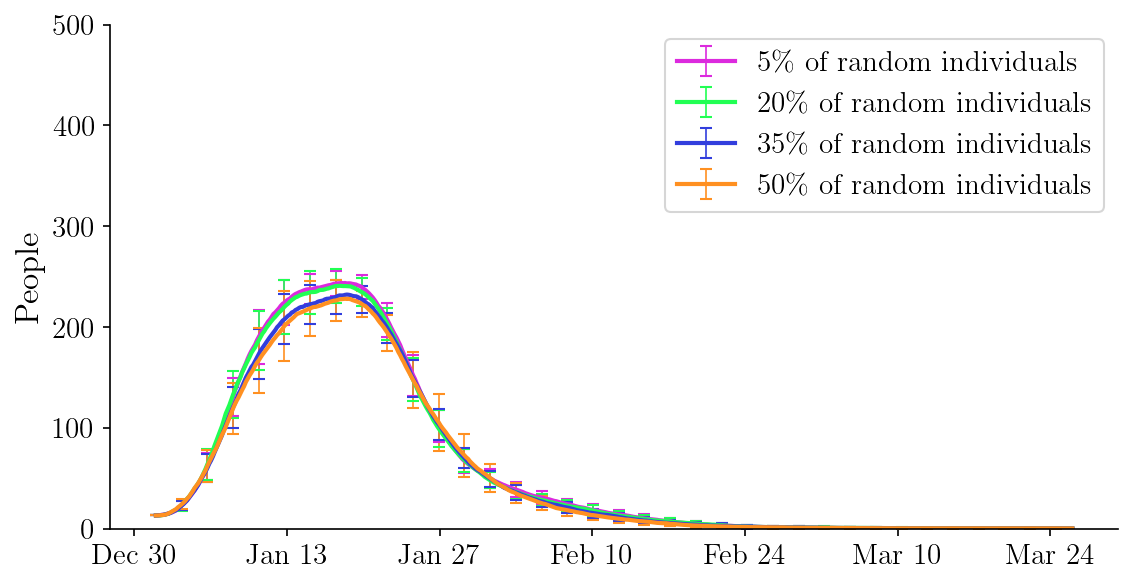

In [50]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate transportation: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyall_comp0.1-0.4-0.7-1_repeats40_bus_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','20\% of random individuals','35\% of random individuals','50\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

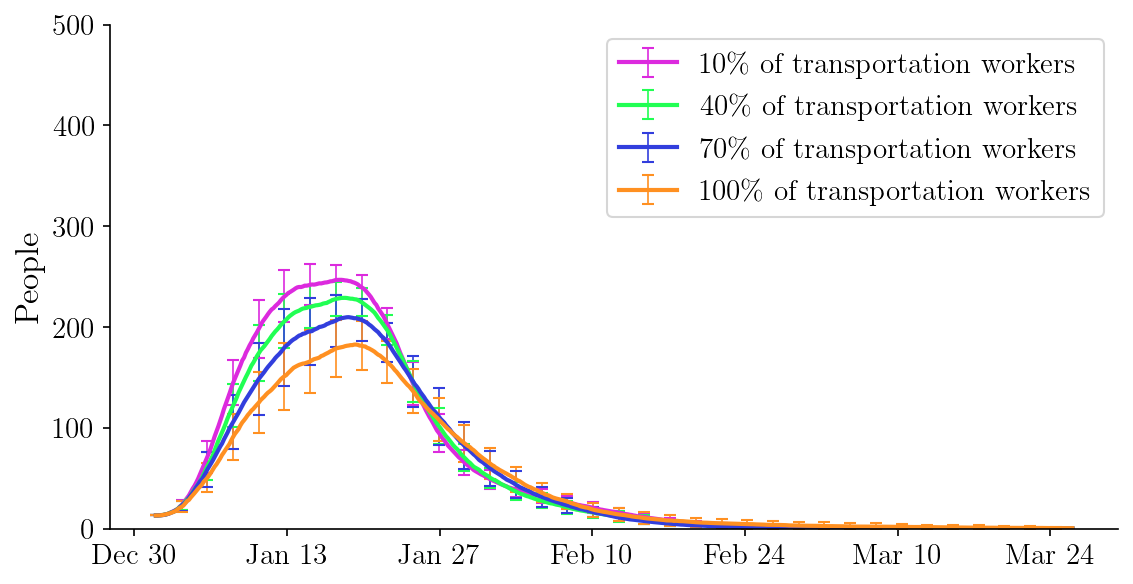

In [51]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate transportation: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyessential_comp0.1-0.4-0.7-1_repeats40_bus_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['10\% of transportation workers','40\% of transportation workers','70\% of transportation workers','100\% of transportation workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

### case 2: downsized by 20-5

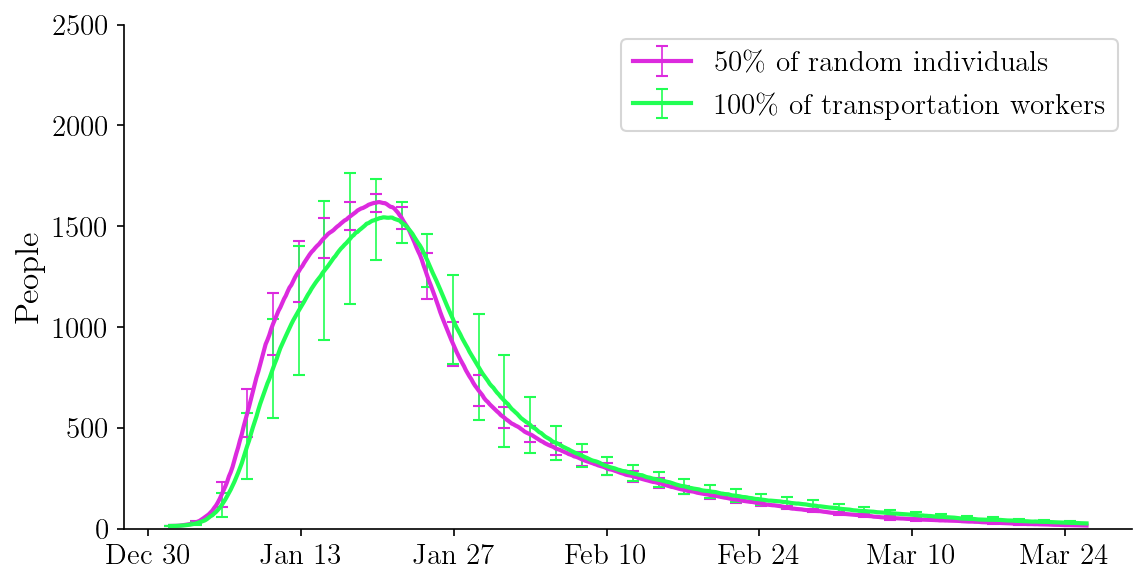

In [9]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare bus workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for bus, 5% for random individual
# mob rate regular: same as German town
# mob rate bus: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,0,7,0,0],essential_dur_mean_per_type = [0,0,8,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats10_bus_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of transportation workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

### 

## social place essential workers vs. random individuals

### case 1: downsized by 100-20

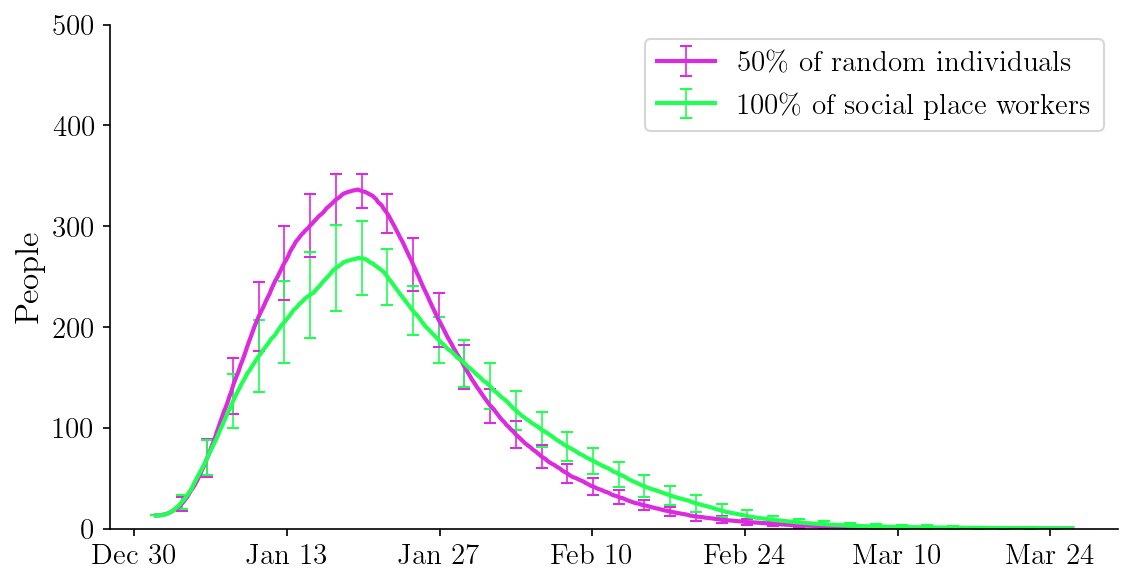

In [55]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare social workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for social, 50% for random individual
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats40_social_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of social place workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

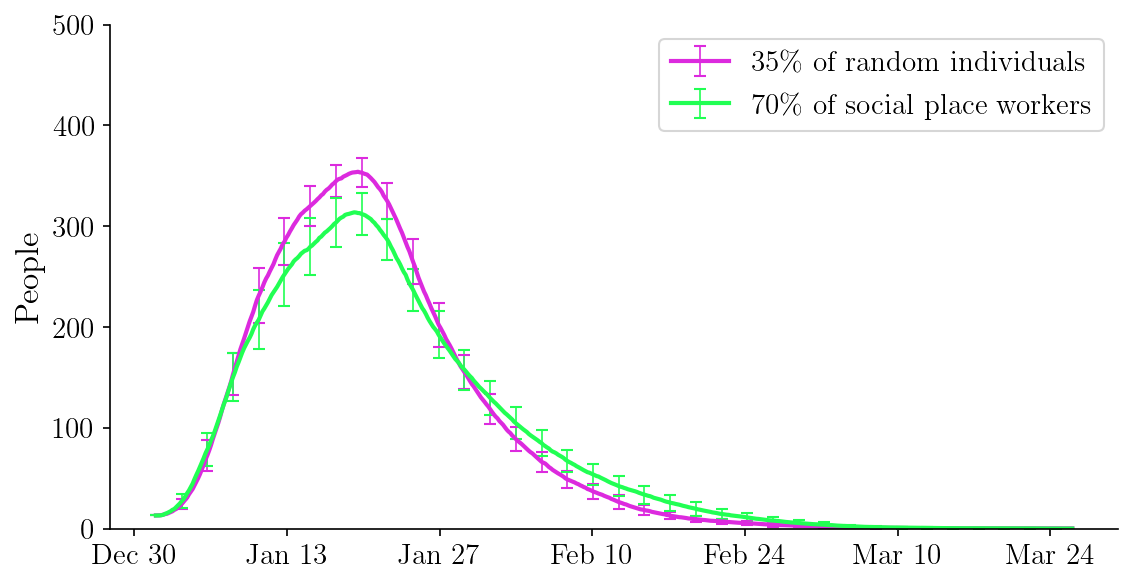

In [57]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare social workers compliant vs. random complaint, number of compliant ~=
# compare 70% compliance for social, 35% for random individual
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.7_repeats40_social_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['35\% of random individuals','70\% of social place workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

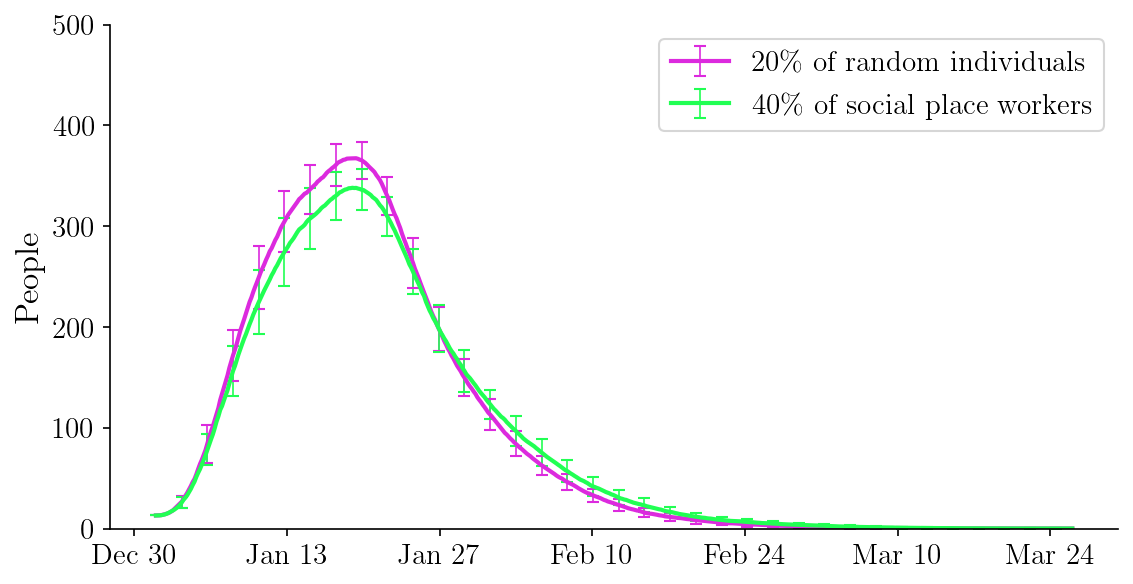

In [58]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare social workers compliant vs. random complaint, number of compliant ~=
# compare 40% compliance for social, 20% for random individual
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.4_repeats40_social_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['20\% of random individuals','40\% of social place workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

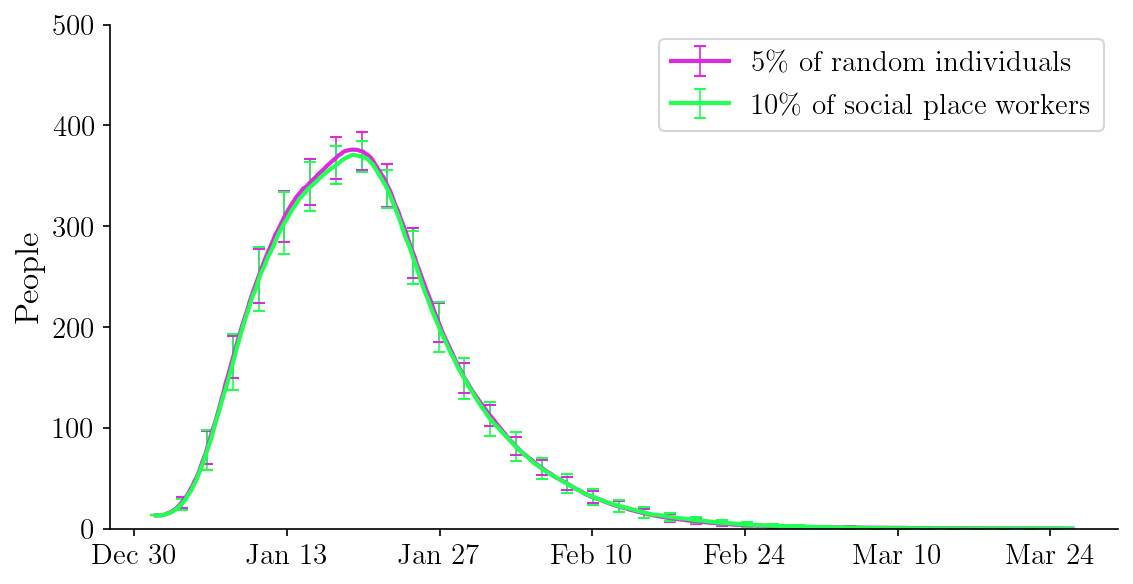

In [59]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare social workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for social, 5% for random individual
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.1_repeats40_social_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','10\% of social place workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

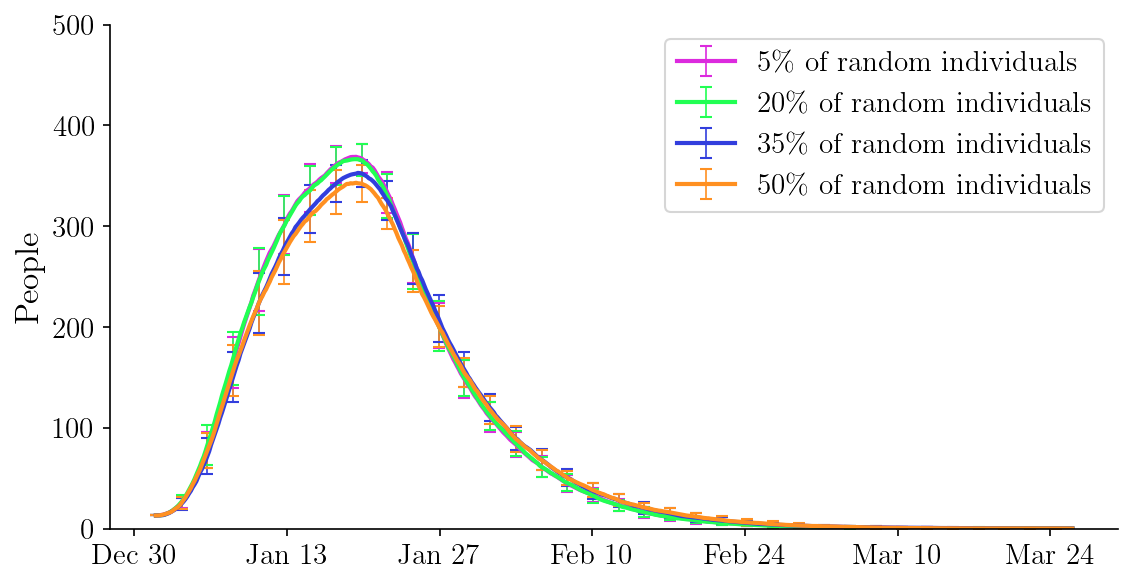

In [54]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyall_comp0.1-0.4-0.7-1_repeats40_social_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','20\% of random individuals','35\% of random individuals','50\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

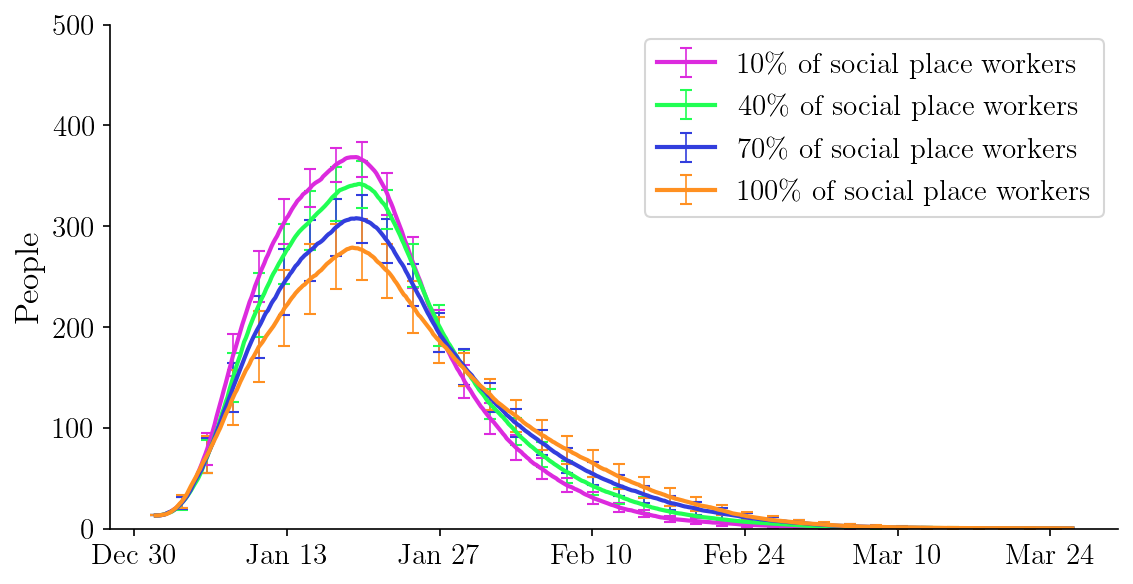

In [52]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyessential_comp0.1-0.4-0.7-1_repeats40_social_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['10\% of social place workers','40\% of social place workers','70\% of social place workers','100\% of social place workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

### case 2: downsized by 20-5

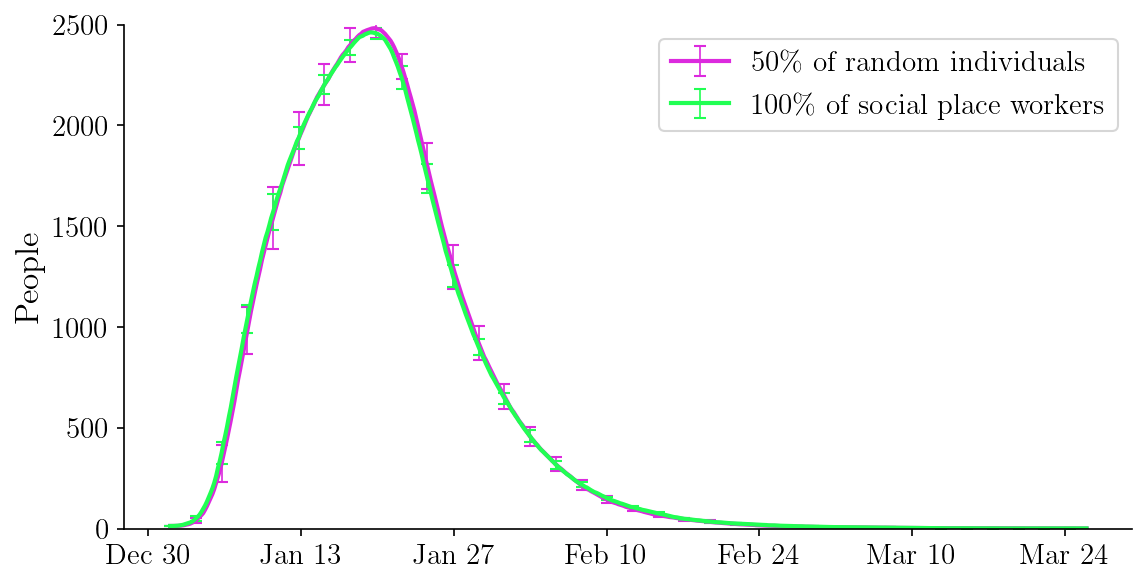

In [13]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare social workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for social, 50% for random individual
# mob rate regular: same as German town
# mob rate social: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0,7,0,0,0],essential_dur_mean_per_type = [0,8,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats10_social_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of social place workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

### 

## school essential workers vs. random individuals

### case 1: downsized by 100-20

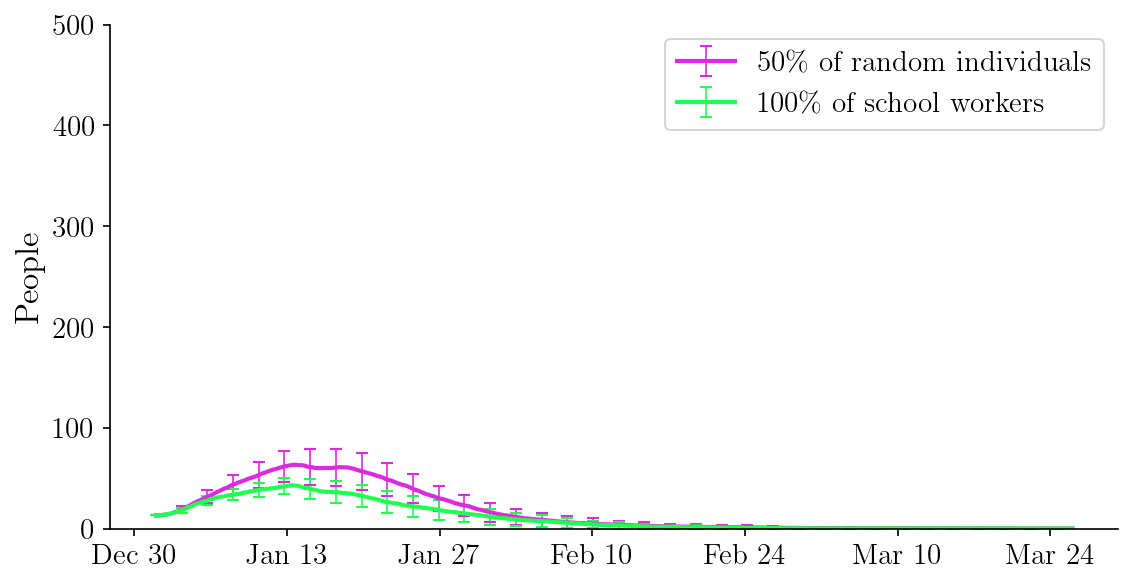

In [64]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare school workers compliant vs. random complaint, number of compliant ~=
# compare 70% compliance for social, 35% for random individual
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats40_school_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of school workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

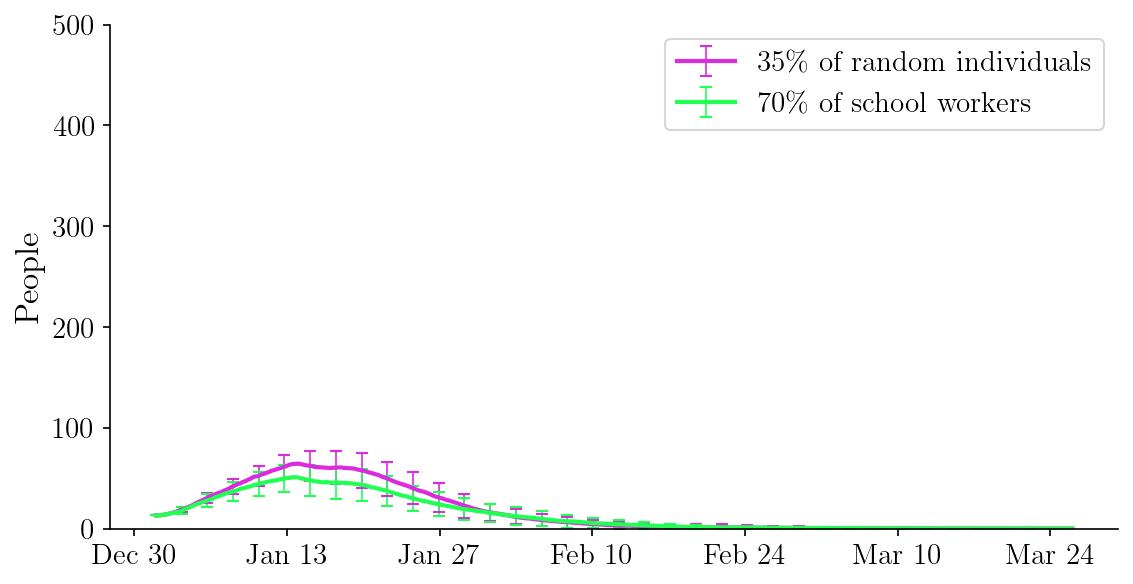

In [62]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare school workers compliant vs. random complaint, number of compliant ~=
# compare 70% compliance for social, 35% for random individual
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.7_repeats40_school_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['35\% of random individuals','70\% of school workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

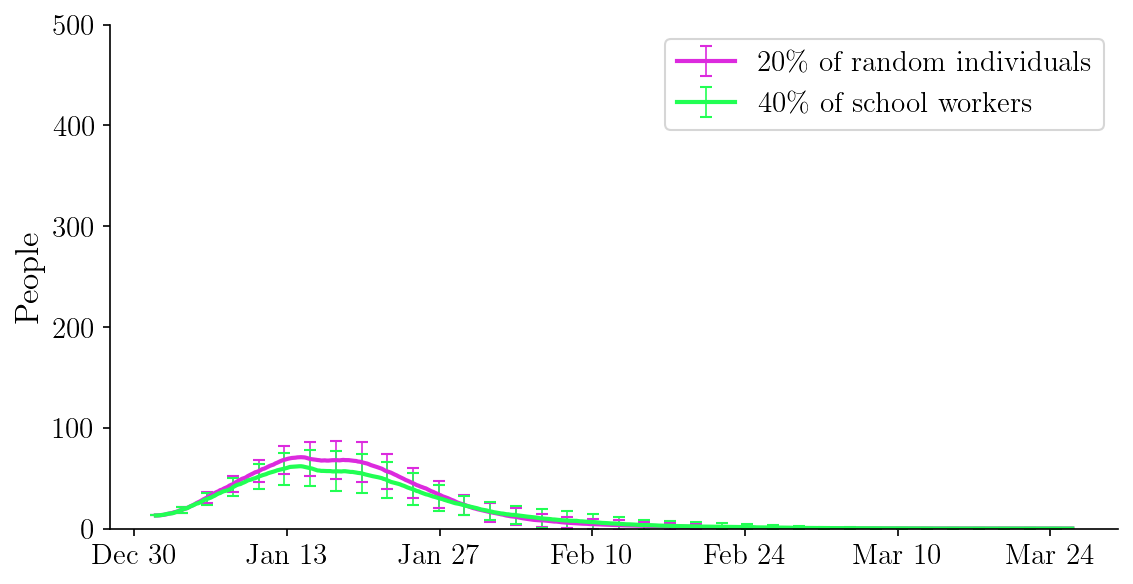

In [61]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare school workers compliant vs. random complaint, number of compliant ~=
# compare 40% compliance for social, 20% for random individual
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.4_repeats40_school_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['20\% of random individuals','40\% of school workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

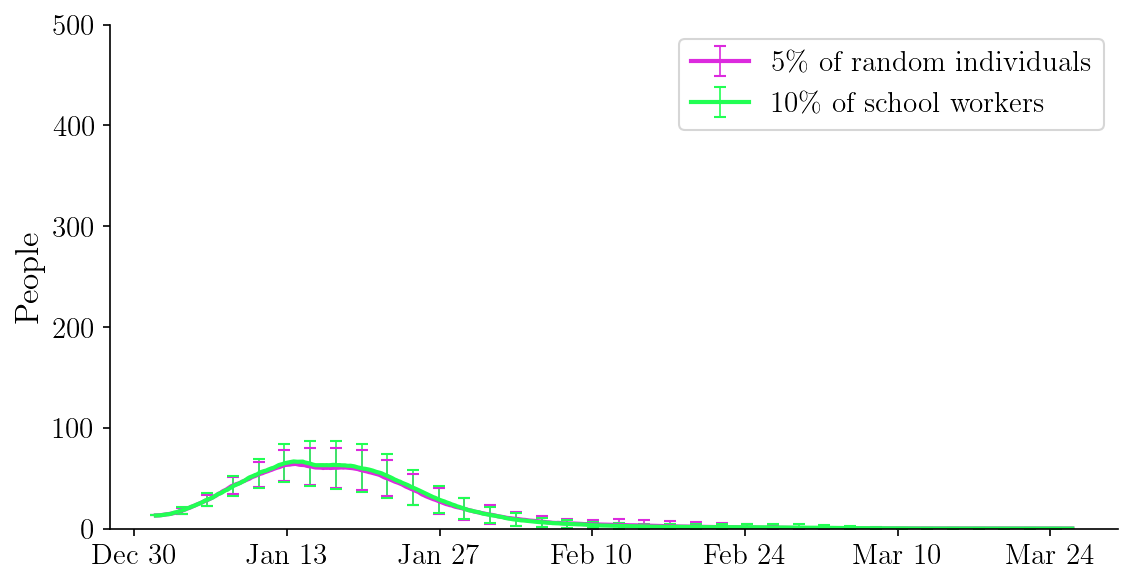

In [60]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare school workers compliant vs. random complaint, number of compliant ~=
# compare 10% compliance for social, 5% for random individual
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp0.1_repeats40_school_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','10\% of school workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

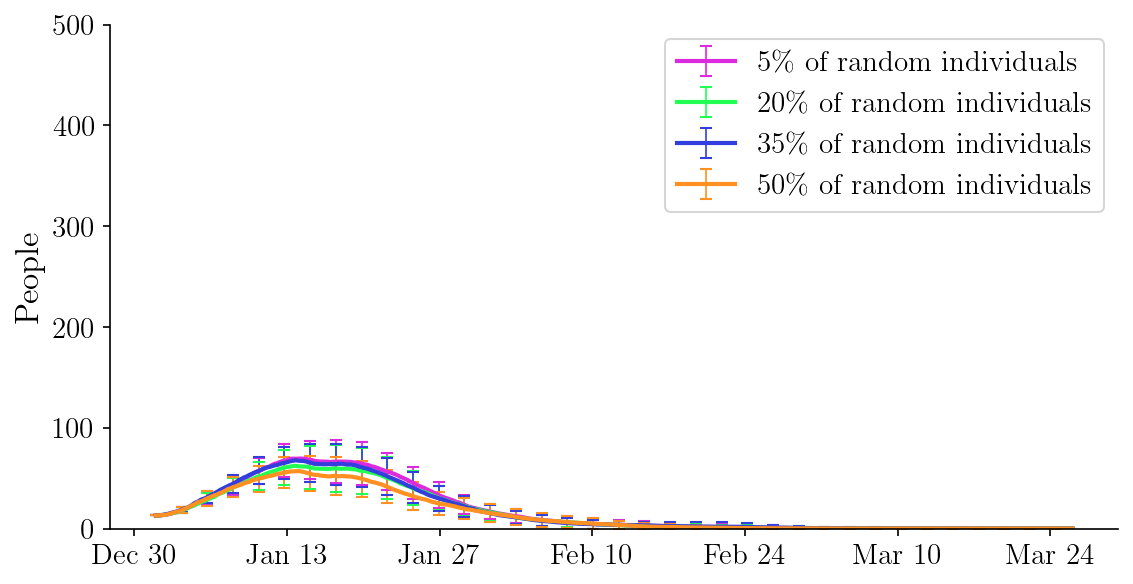

In [66]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyall_comp0.1-0.4-0.7-1_repeats40_school_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['5\% of random individuals','20\% of random individuals','35\% of random individuals','50\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

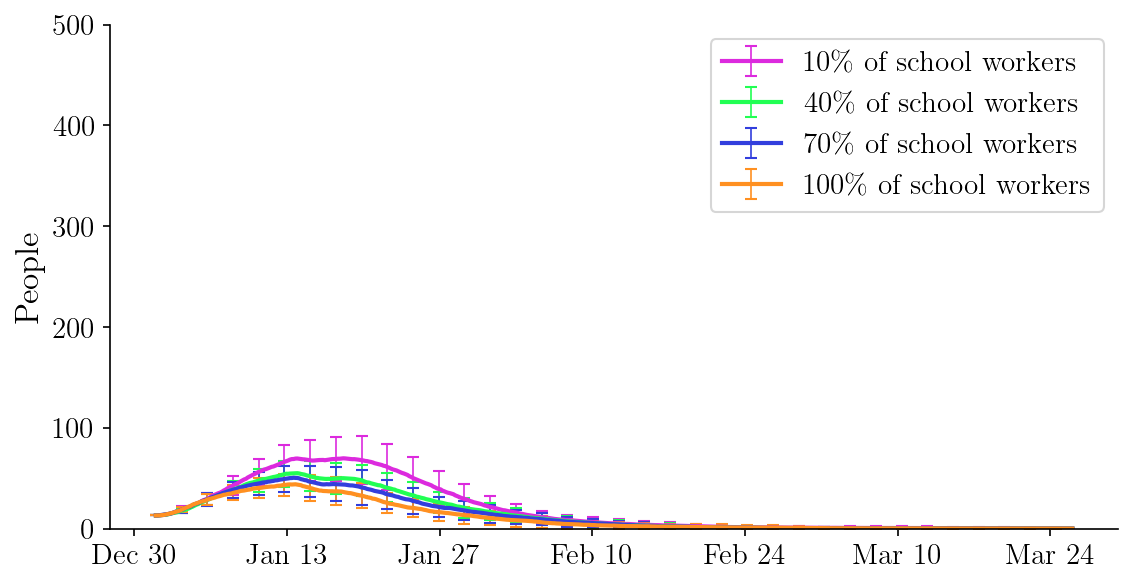

In [67]:
# downsized 100 by pop, 20 by town, 40 random repeats
# 47.19% essential to total prop, essential: 429, non-essential: 480, total: 909, sites:47
# compare essential complaince rates, 10%, 40%, 70%, 100%
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyessential_comp0.1-0.4-0.7-1_repeats40_school_settings_100_20.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['10\% of school workers','40\% of school workers','70\% of school workers','100\% of school workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

### case 2: downsized by 20-5

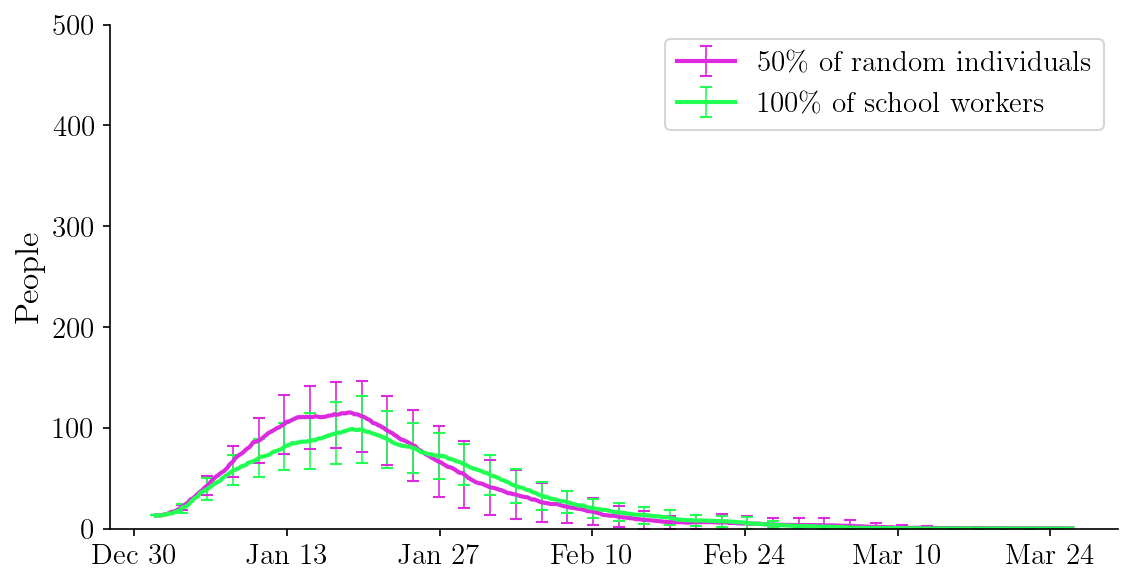

In [14]:
# downsized 20 by pop, 5 by town, 10 random repeats
# 50.44% essential to total prop, essential: 2287, non-essential: 2244, total: 4528, sites:190
# compare school workers compliant vs. random complaint, number of compliant ~=
# compare 100% compliance for school, 50% for random individual
# mob rate regular: same as German town
# mob rate school: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [7,0,0,0,0],essential_dur_mean_per_type = [8,0,0,0,0]
# mob rate zero elsewhere

summaries_SD_6 = load_summary('comp1.0_repeats10_school_settings_20_5.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['50\% of random individuals','100\% of school workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=500, errorevery=14)

### 

# different proportion of essential pop

## supermarket

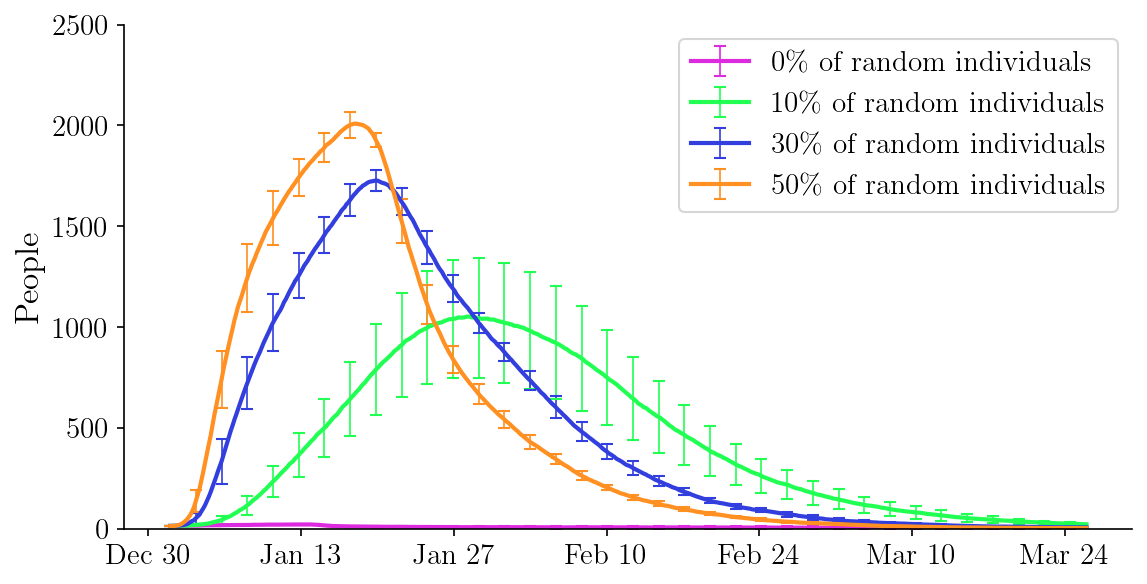

In [24]:
# downsized 20 by pop, 4 by town, 10 random repeats
# total pop: 4528, sites: 238
# 4 cases: essential prop: [0%, 10%, 30%, 50%], # of essential [0, 451, 1375, 2284]
# assume 70% of the essential pop comply, compare equal # of random individuals in the 4 cases
# i.e. complare compliace rate for random indiv: [0%, 10%, 30%, 50%]*70% (compliant over total pop)
# mob rate regular: same as German town
# essential mob rate supermarket: 7 days per week,8 hours per day
# essential_mob_rate_per_type = [0.0 , 0.0 , 0.0 , 0.0, 7.0], essential_dur_mean_per_type = [0,0,0,0,8]
# essential mob rate zero elsewhere

summaries_SD_6 = load_summary('onlyall_essential-prop[0.0,0.1,0.3,0.5]_comp0.35309187279151943_repeats10_essential-prop0.5_supermarket_settings_20_4.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% of random individuals','10\% of random individuals','30\% of random individuals','50\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

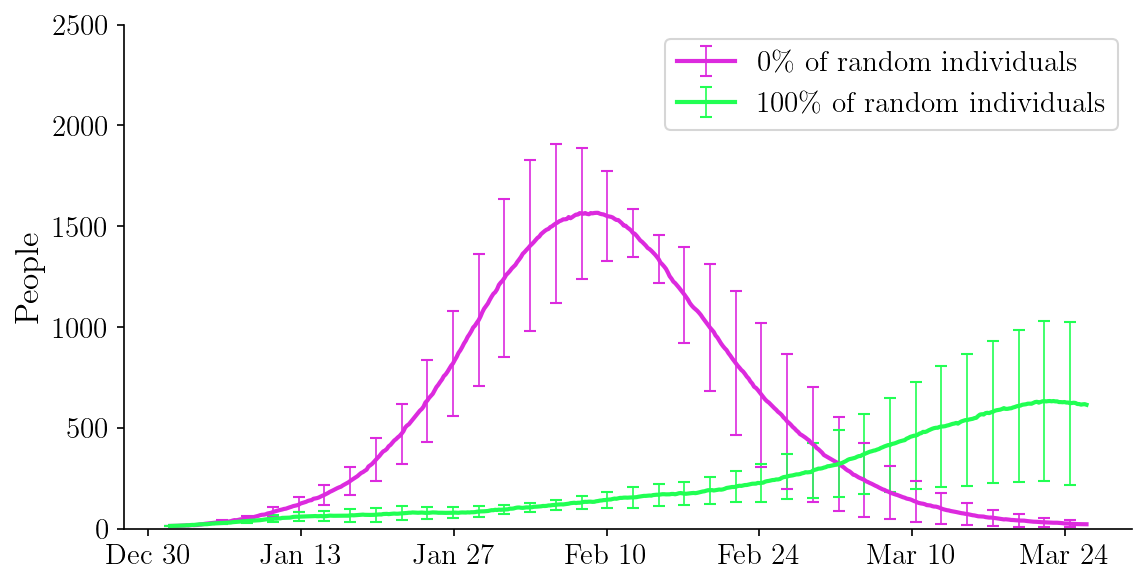

In [22]:
# test from reproduce, essential prop: 0, downsized: 20-4, repeat 4, comp: 0,1
# random indiv comply
summaries_SD_6 = load_summary('summaries_20_10_repeat4_test02.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% of random individuals','100\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=2500, errorevery=14)

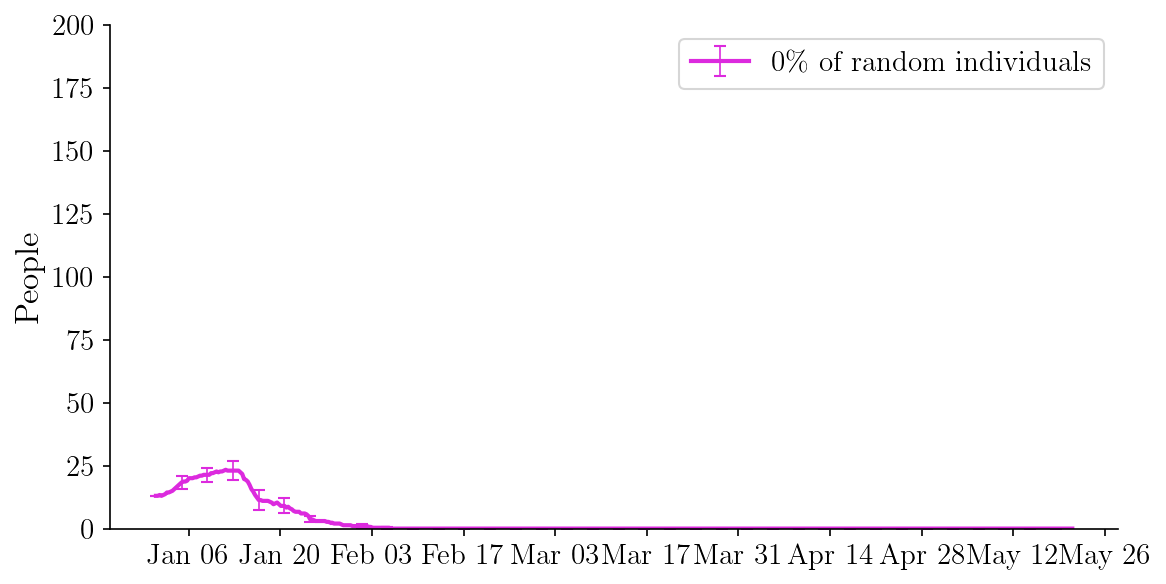

In [23]:
# test from april-22_essential-server, essential prop: 0, downsized: 20-4, repeat 4, comp: 0,1
# random indiv comply
summaries_SD_6 = load_summary('essentialprop0_comp0.0_repeats3_20weeks_essential-prop0_school_settings_20_4.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% of random individuals','100\% of random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=200, errorevery=14)

### 

# SF

# SF

# SF

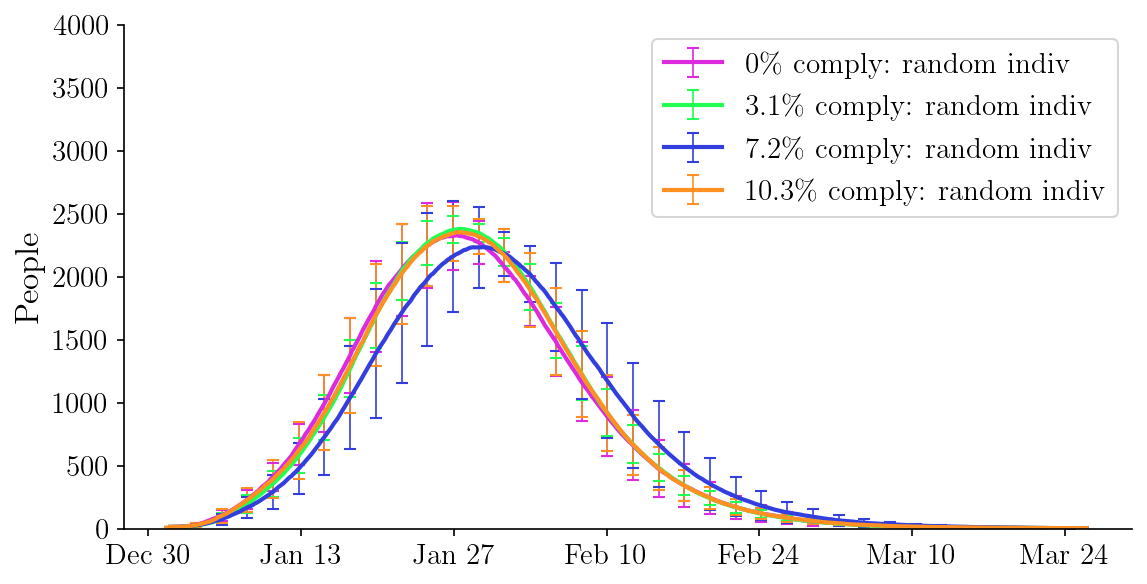

In [43]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for RANDOM indiv, [0%, 30%, 70%, 100%] equivalent of essential comply
# compliance rates for random indiv: [0%, 30%, 70%, 100%] * 10.34% = [0%, 3.1%, 7.2%, 10.3%]
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [6.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [1.0, 1.0, 4.0, 4.0]
# essential dur time essential: essential_dur_mean_per_type = [1.0, 4.0, 5.4, 0.64]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('onlyall_comp[0.0,0.031.0.072,0.103]_repeats10_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% comply: random indiv','3.1\% comply: random indiv',
         '7.2\% comply: random indiv','10.3\% comply: random indiv']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

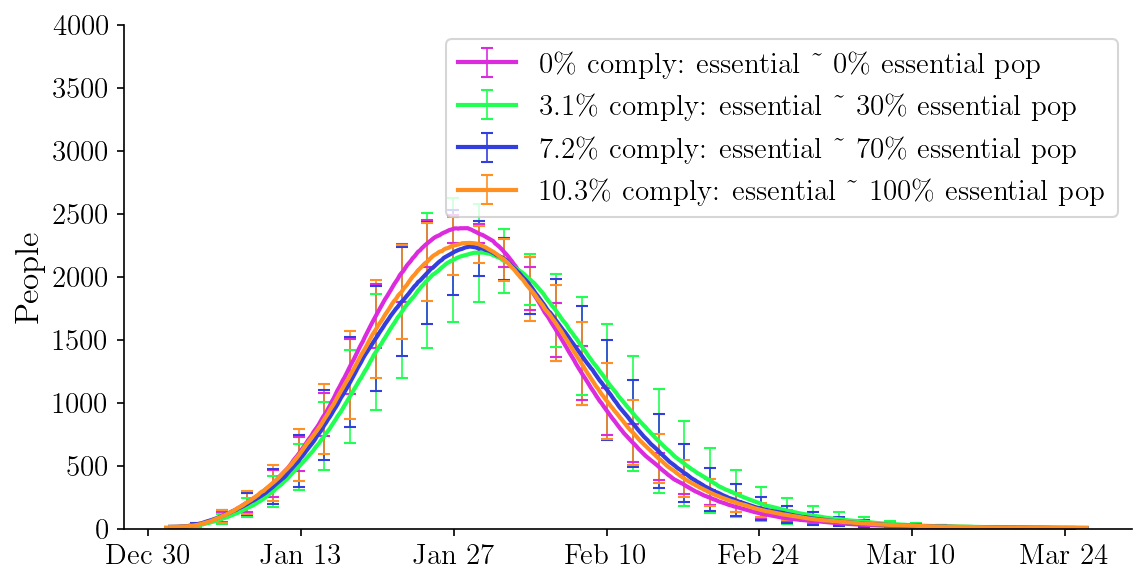

In [45]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL, [0%, 30%, 70%, 100%]
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [6.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [1.0, 1.0, 4.0, 4.0]
# essential dur time essential: essential_dur_mean_per_type = [1.0, 4.0, 5.4, 0.64]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('onlyessential_comp[0.0,0.3,0.7,1.0]_repeats10_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% comply: essential \~\ 0\% essential pop','3.1\% comply: essential \~\ 30\% essential pop',
         '7.2\% comply: essential \~\ 70\% essential pop','10.3\% comply: essential \~\ 100\% essential pop']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

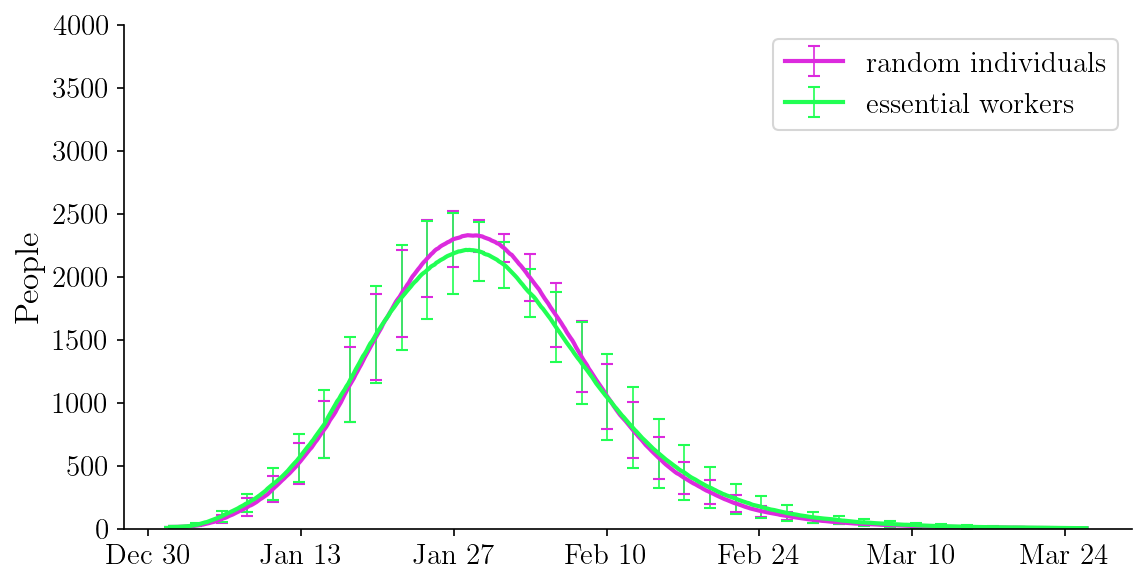

In [46]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL VS RANDOM, [100%] for essential ~ 602 people comply
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [6.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [1.0, 1.0, 4.0, 4.0]
# essential dur time essential: essential_dur_mean_per_type = [1.0, 4.0, 5.4, 0.64]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('comp[1.0]_repeats10_one-comp_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

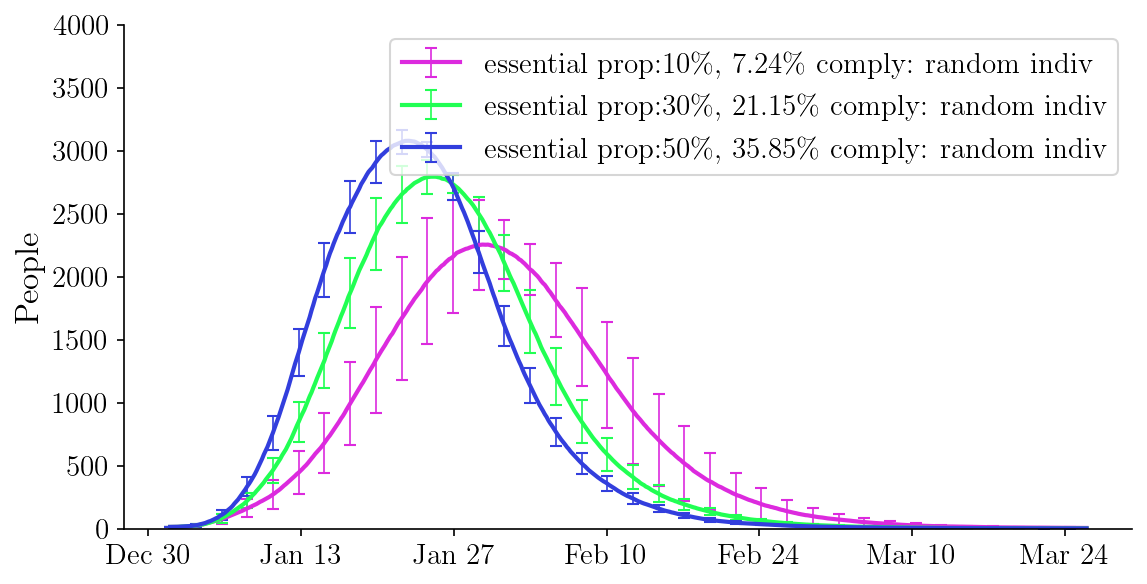

In [44]:
# downsized 50 by pop, 50 by town, 10 random repeats
# total: 5821, sites:163
# COMPARE complaince rates for RANDOM indiv, 3 essential prop [10%, 30%, 50%], assume essential comply at 70%
# 10% are essential: 10.34% essential to total prop, essential: 602, non-essential: 5219, essential comply at 70%
# 30% are essential: 30.22% essential to total prop, essential: 1759, non-essential: 4062, essential comply at 70%
# 50% are essential: 51.21% essential to total prop, essential: 2981, non-essential: 2840, essential comply at 70%
# regular data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [6.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [1.0, 1.0, 4.0, 4.0]
# essential dur time essential: essential_dur_mean_per_type = [1.0, 4.0, 5.4, 0.64]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('onlyall_essential-prop[0.1,0.3,0.5]_comp0.3585_repeats10_essential-prop0.5_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['essential prop:10\%, 7.24\% comply: random indiv',
         'essential prop:30\%, 21.15\% comply: random indiv',
         'essential prop:50\%, 35.85\% comply: random indiv']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

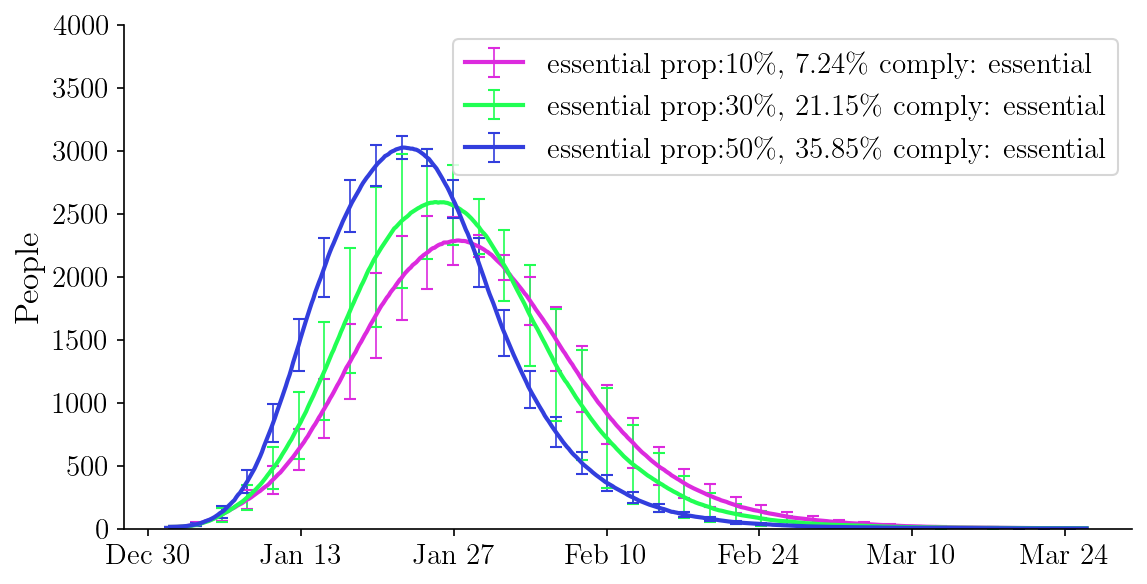

In [48]:
# downsized 50 by pop, 50 by town, 10 random repeats
# total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL, 3 essential prop [10%, 30%, 50%]
# 10% are essential: 10.34% essential to total prop, essential: 602, non-essential: 5219, essential comply at 70%
# 30% are essential: 30.22% essential to total prop, essential: 1759, non-essential: 4062, essential comply at 70%
# 50% are essential: 51.21% essential to total prop, essential: 2981, non-essential: 2840, essential comply at 70%
# regular data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [6.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [1.0, 1.0, 4.0, 4.0]
# essential dur time essential: essential_dur_mean_per_type = [1.0, 4.0, 5.4, 0.64]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('onlyessential_essential-prop[0.1,0.3,0.5]_comp0.7_repeats10_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['essential prop:10\%, 7.24\% comply: essential',
         'essential prop:30\%, 21.15\% comply: essential',
         'essential prop:50\%, 35.85\% comply: essential']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

### new

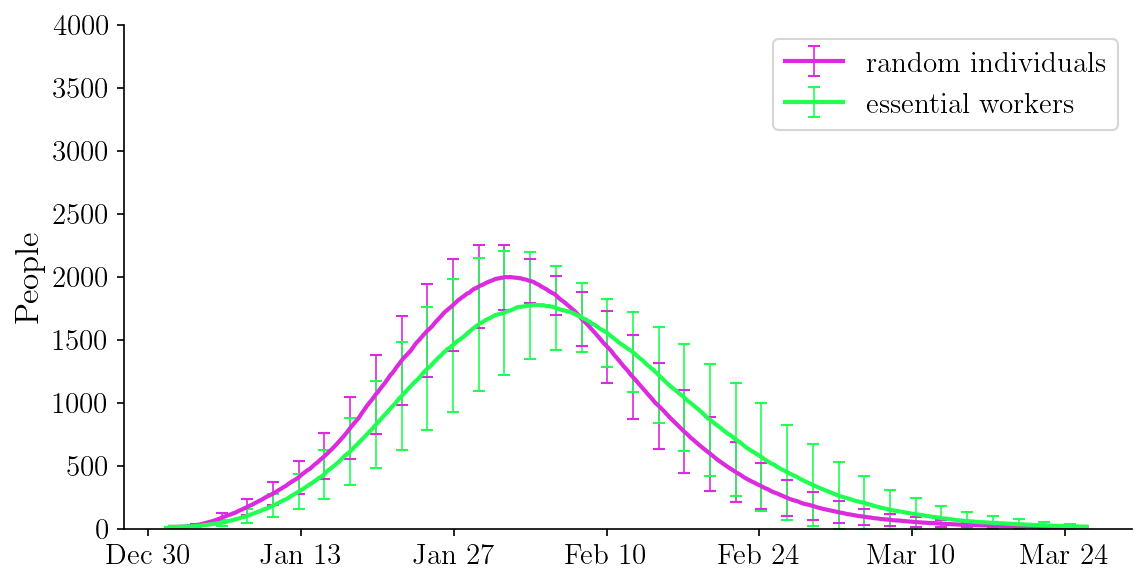

In [47]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL VS RANDOM, [100%] for essential ~ 602 people comply
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5.0, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5.0, 0.4]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('new_comp[1.0]_repeats10_one-comp_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

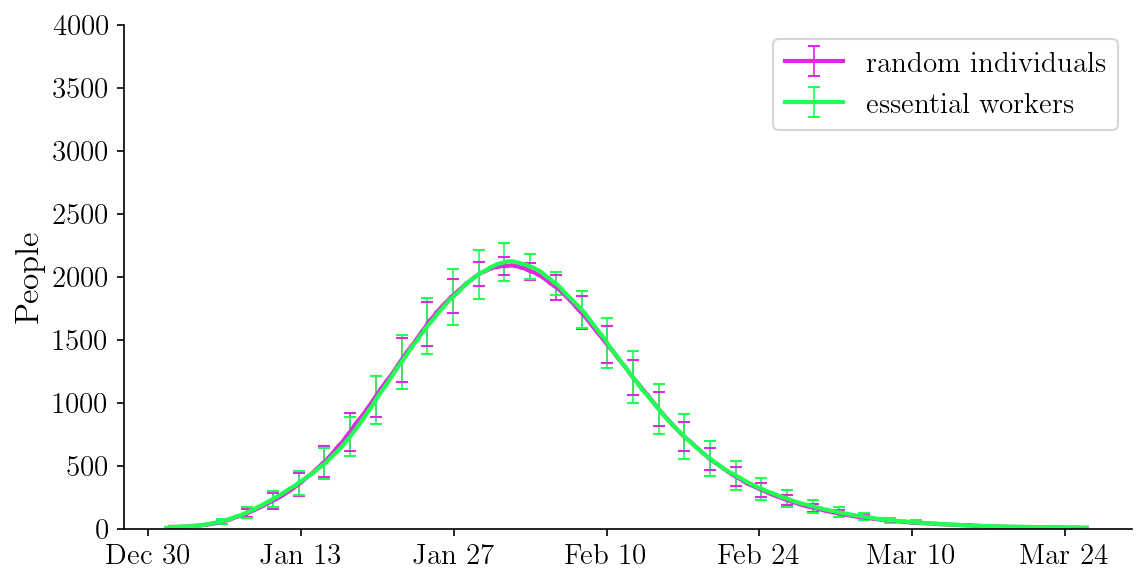

In [53]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL VS RANDOM, [70%] for essential ~ 602 people comply
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5.0, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5.0, 0.4]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('new_comp[0.7]_repeats10_one-comp_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

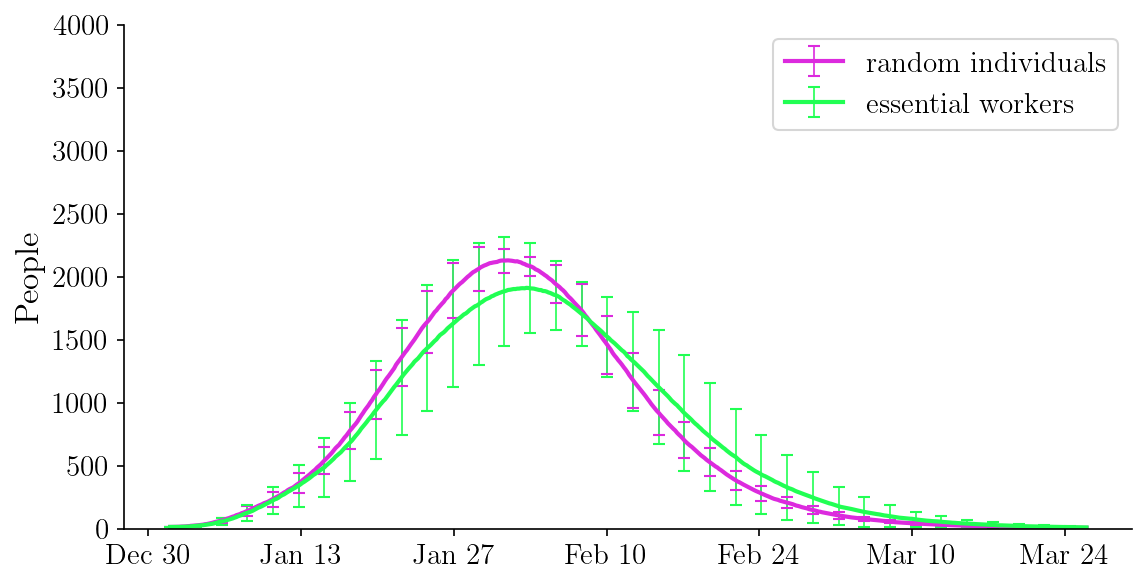

In [57]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL VS RANDOM, [0%] for essential ~ 0 people comply
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5.0, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5.0, 0.4]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('new_comp[0.0]_repeats10_one-comp_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

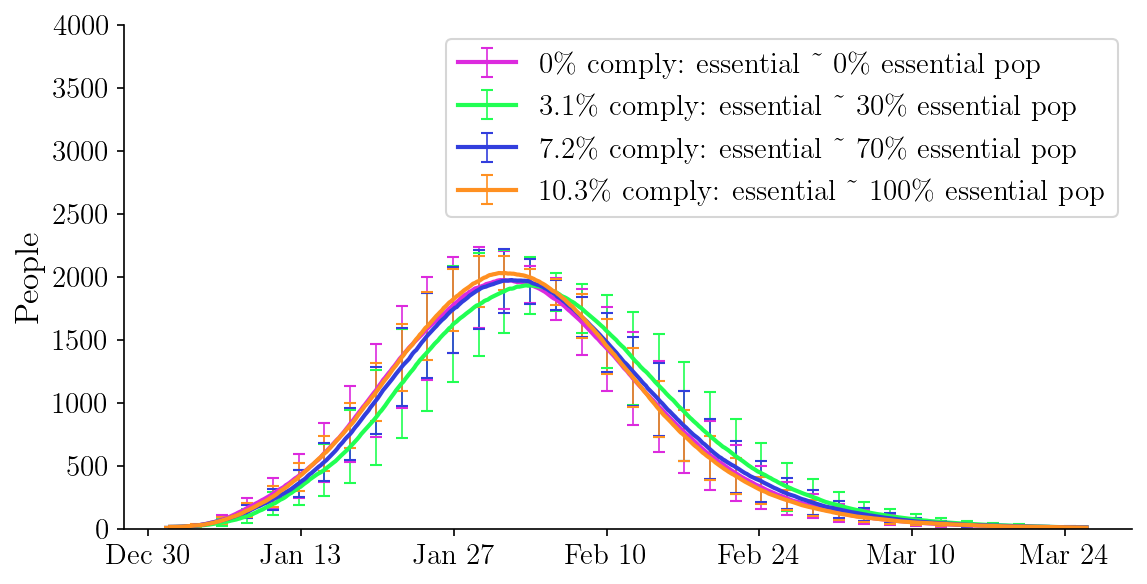

In [49]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL, [0%, 30%, 70%, 100%]
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5.0, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5.0, 0.4]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('new_onlyessential_comp[0.0,0.3,0.7,1.0]_repeats10_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% comply: essential \~\ 0\% essential pop','3.1\% comply: essential \~\ 30\% essential pop',
         '7.2\% comply: essential \~\ 70\% essential pop','10.3\% comply: essential \~\ 100\% essential pop']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

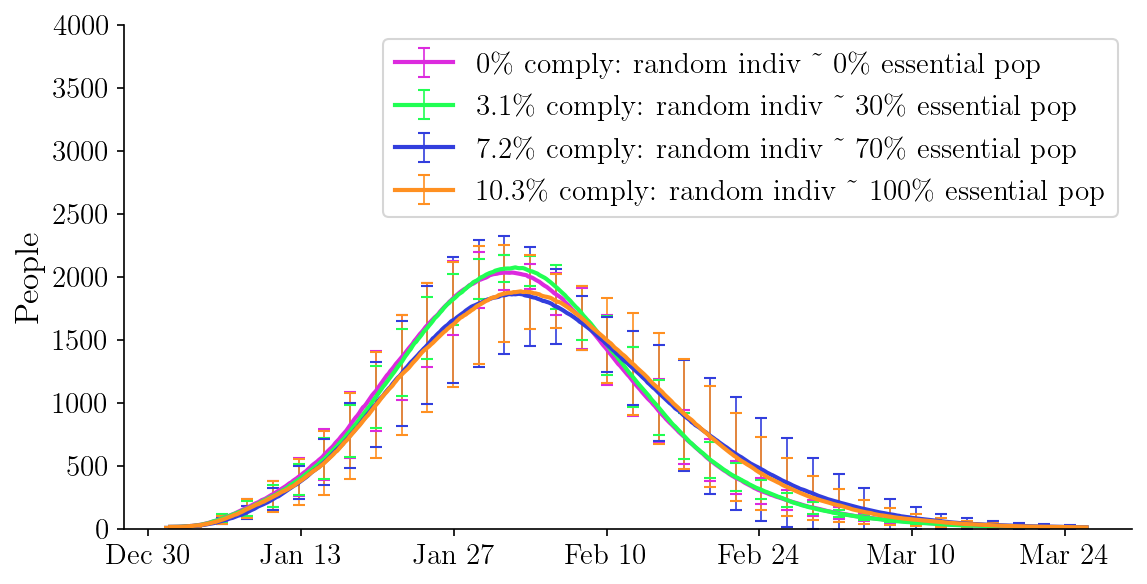

In [55]:
# downsized 50 by pop, 50 by town, 10 random repeats
# 10.34% essential to total prop, essential: 602, non-essential: 5219, total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL, [0%, 30%, 70%, 100%]
# regular mob data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5.0, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5.0, 0.4]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('new_onlyall_comp[0.0,0.03103,0.07239,0.1034]_repeats10_essential-prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\% comply: random indiv \~\ 0\% essential pop','3.1\% comply: random indiv \~\ 30\% essential pop',
         '7.2\% comply: random indiv \~\ 70\% essential pop','10.3\% comply: random indiv \~\ 100\% essential pop']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

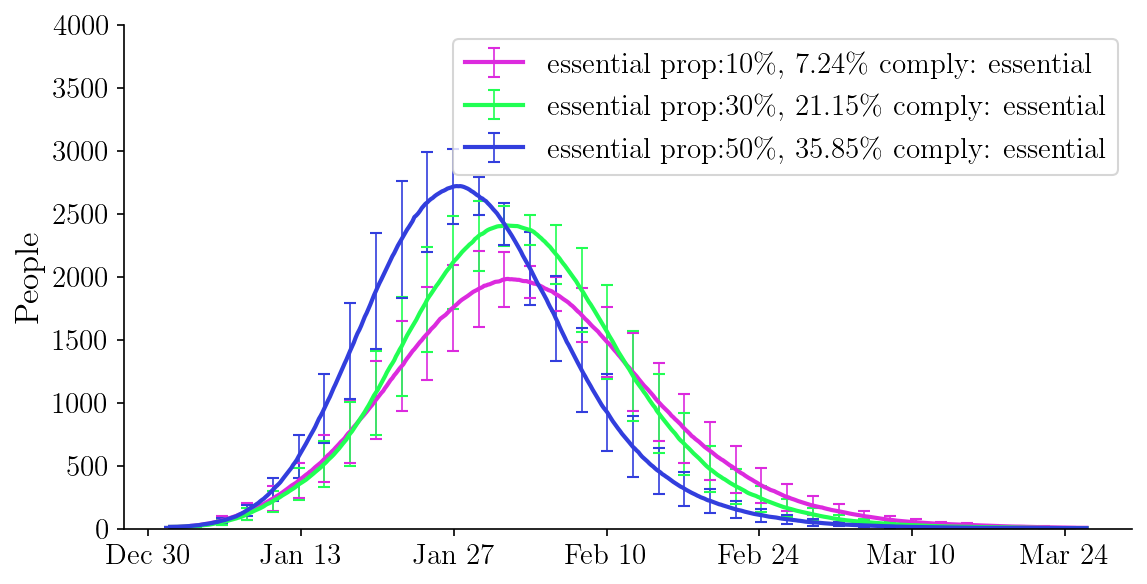

In [50]:
# downsized 50 by pop, 50 by town, 10 random repeats
# total: 5821, sites:163
# COMPARE complaince rates for ESSENTIAL, 3 essential prop [10%, 30%, 50%]
# 10% are essential: 10.34% essential to total prop, essential: 602, non-essential: 5219, essential comply at 70%
# 30% are essential: 30.22% essential to total prop, essential: 1759, non-essential: 4062, essential comply at 70%
# 50% are essential: 51.21% essential to total prop, essential: 2981, non-essential: 2840, essential comply at 70%
# regular data: Zihan SF data
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5.0, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5.0, 0.4]
#                                                           edu, office, social, supermarket

summaries_SD_6 = load_summary('new_onlyessential_essential-prop[0.1,0.3,0.5]_comp0.7_repeats10_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['essential prop:10\%, 7.24\% comply: essential',
         'essential prop:30\%, 21.15\% comply: essential',
         'essential prop:50\%, 35.85\% comply: essential']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

# assign work place for each essential worker

### First downsample the population and sites by the same factor

### define essential population

### define essential worker type and find all essential places in the downsampled sites

### each essential worker will now only go to the assigned work place

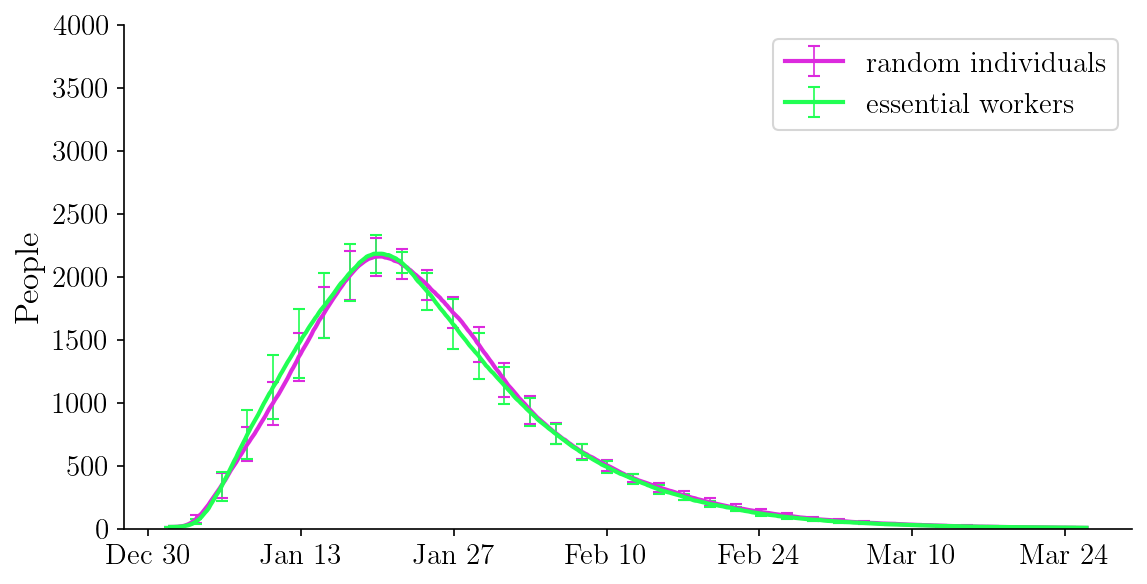

In [3]:
summaries_SD_6 = load_summary('comp[1.0]_repeats10_one-comp_essential-type2_prop0.1_sf_settings_50_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=4000, errorevery=14)

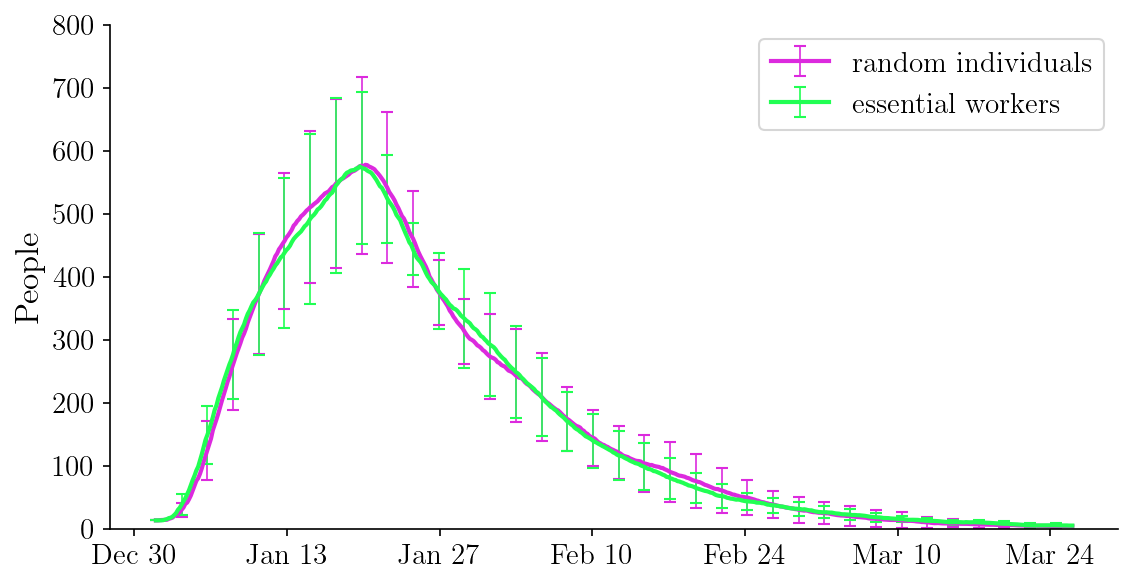

In [24]:
# total population: 2041 , sites: 114
# essential: 987 , non_essential: 1054 , propotion: 0.48358647721705045
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# essential prop by age: [0.         0.         0.54987835 0.4850214  0.71002278 0.76335878
#  0.15549451 0.        ]
# sites by type: [58, 4, 46, 6]
# essential type: 2
# work site id: [81, 38, 7, 3, 28, 9, 75, 65, 43, 62, 73, 74, 35, 12, 20, 67, 48, 101, 
#                91, 8, 55, 112, 104, 30, 80, 93, 47, 45, 51, 70, 2, 25, 76, 96, 53, 94, 
#                92, 87, 27, 86, 52, 107, 88, 17, 54, 113]
# number of workers at each work site: [10, 25, 20, 15, 21, 23, 19, 20, 28, 16, 25, 23, 
#                                       23, 29, 22, 19, 29, 29, 22, 19, 23, 14, 25, 23, 
#                                       25, 22, 22, 25, 22, 14, 14, 25, 23, 22, 21, 27, 
#                                       24, 16, 24, 20, 24, 22, 19, 14, 21, 19] 987
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5, 0.4]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type2_prop0.1_sf_settings_75_75.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=800, errorevery=14)

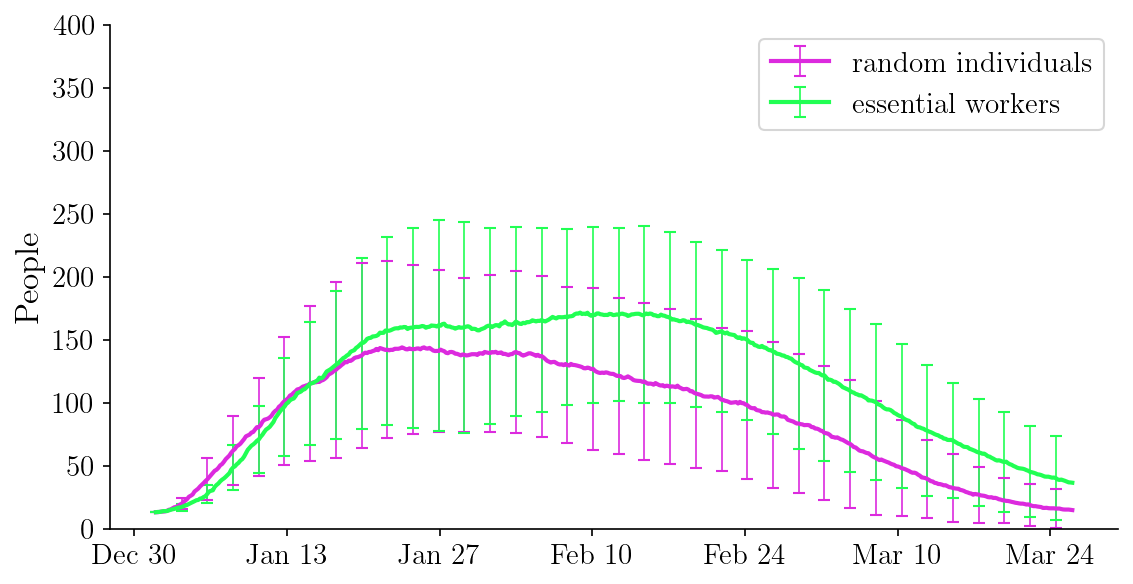

In [22]:
# total population: 2041 , sites: 114
# essential: 987 , non_essential: 1054 , propotion: 0.48358647721705045
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# essential prop by age: [0.         0.         0.54987835 0.4850214  0.71002278 0.76335878
#  0.15549451 0.        ]
# sites by type: [58, 4, 46, 6]
# essential type: 2
# work site id: [81, 38, 7, 3, 28, 9, 75, 65, 43, 62, 73, 74, 35, 12, 20, 67, 48, 101, 
#                91, 8, 55, 112, 104, 30, 80, 93, 47, 45, 51, 70, 2, 25, 76, 96, 53, 94, 
#                92, 87, 27, 86, 52, 107, 88, 17, 54, 113]
# number of workers at each work site: [10, 25, 20, 15, 21, 23, 19, 20, 28, 16, 25, 23, 
#                                       23, 29, 22, 19, 29, 29, 22, 19, 23, 14, 25, 23, 
#                                       25, 22, 22, 25, 22, 14, 14, 25, 23, 22, 21, 27, 
#                                       24, 16, 24, 20, 24, 22, 19, 14, 21, 19] 987
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5, 0.4]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type2_prop0.5_sf_settings_75_75.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=400, errorevery=14)

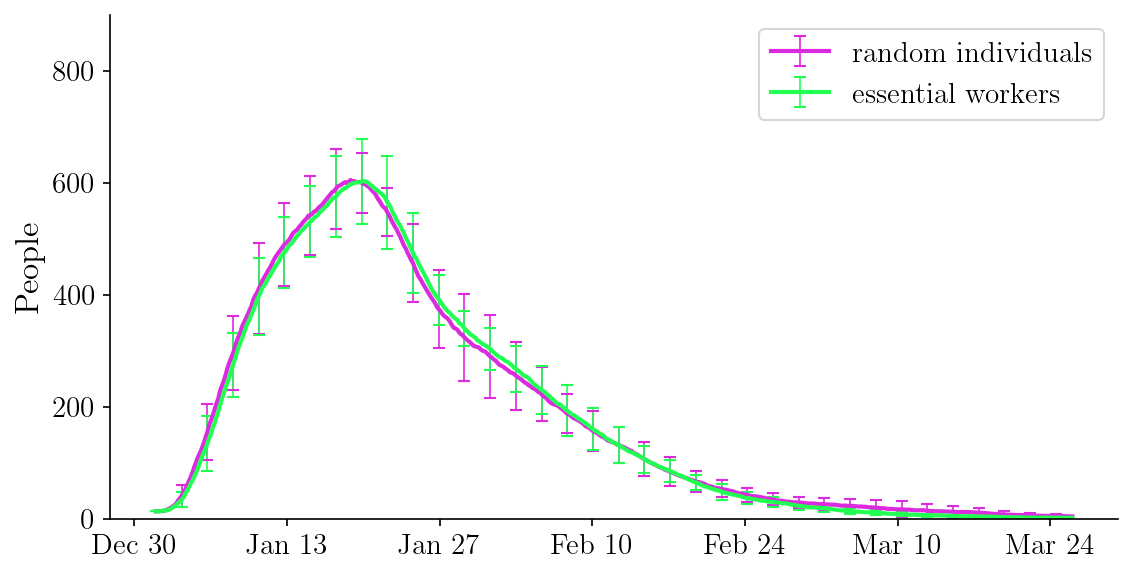

In [25]:
# total population: 2041 , sites: 114
# essential: 208 , non_essential: 1833 , propotion: 0.10191082802547771
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# essential prop by age: [0.         0.         0.10948905 0.09557775 0.14191344 0.15222272
#  0.03076923 0.        ]
# sites by type: [58, 4, 46, 6]
# essential type: 3
# work site id: [11, 34, 1, 50, 33, 69]
# number of workers at each work site: [35, 38, 33, 33, 31, 38] 208
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 3.6, 5]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 0.64, 5]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type3_prop0.1_sf_settings_75_75.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=900, errorevery=14)

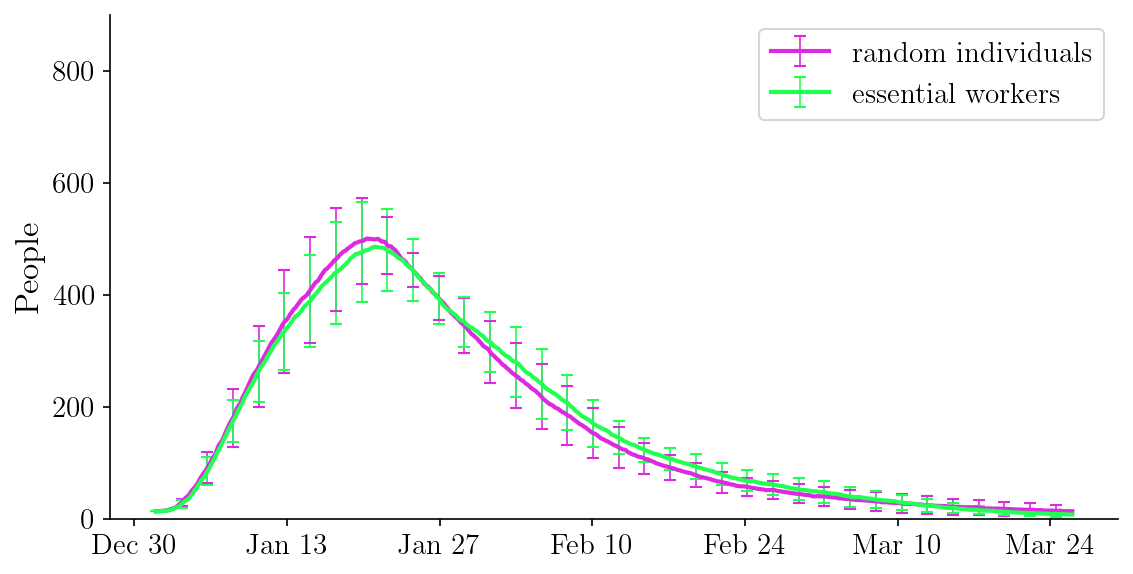

In [26]:
# total population: 2041 , sites: 171
# essential: 208 , non_essential: 1833 , propotion: 0.10191082802547771
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# essential prop by age: [0.         0.         0.10948905 0.09557775 0.14191344 0.15222272
#  0.03076923 0.        ]
# sites by type: [85, 8, 68, 10]
# essential type: 3
# work site id: [33, 69, 11, 140, 139, 50, 1, 134, 34, 154]
# number of workers at each work site: [27, 28, 20, 20, 15, 21, 17, 20, 14, 26] 208
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 3.6, 5]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 0.64, 5]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type3_prop0.1_sf_settings_75_50.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=900, errorevery=14)

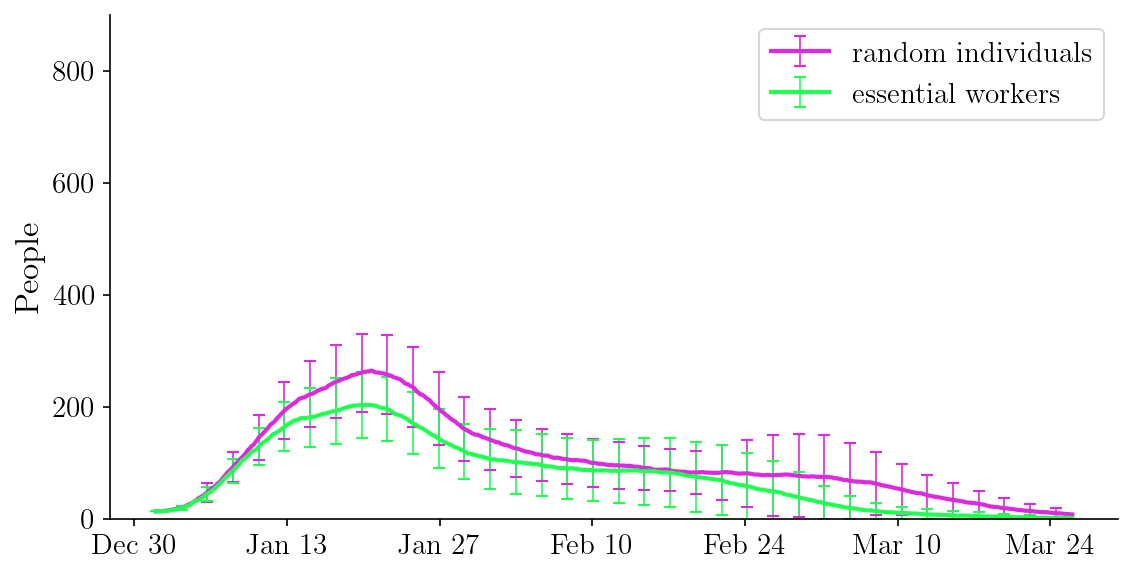

In [27]:
# total population: 2041 , sites: 342
# essential: 208 , non_essential: 1833 , propotion: 0.10191082802547771
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# essential prop by age: [0.         0.         0.10948905 0.09557775 0.14191344 0.15222272
#  0.03076923 0.        ]
# sites by type: [158, 16, 150, 18]
# essential type: 3
# work site id: [69, 154, 11, 33, 259, 50, 225, 140, 301, 1, 245, 134, 139, 239, 34, 309, 319, 246]
# number of workers at each work site: [11, 17, 11, 12, 15, 15, 12, 8, 11, 10, 11, 9, 14, 9, 9, 11, 16, 7] 208
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 3.6, 5]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 0.64, 5]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type3_prop0.1_sf_settings_75_25.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=900, errorevery=14)

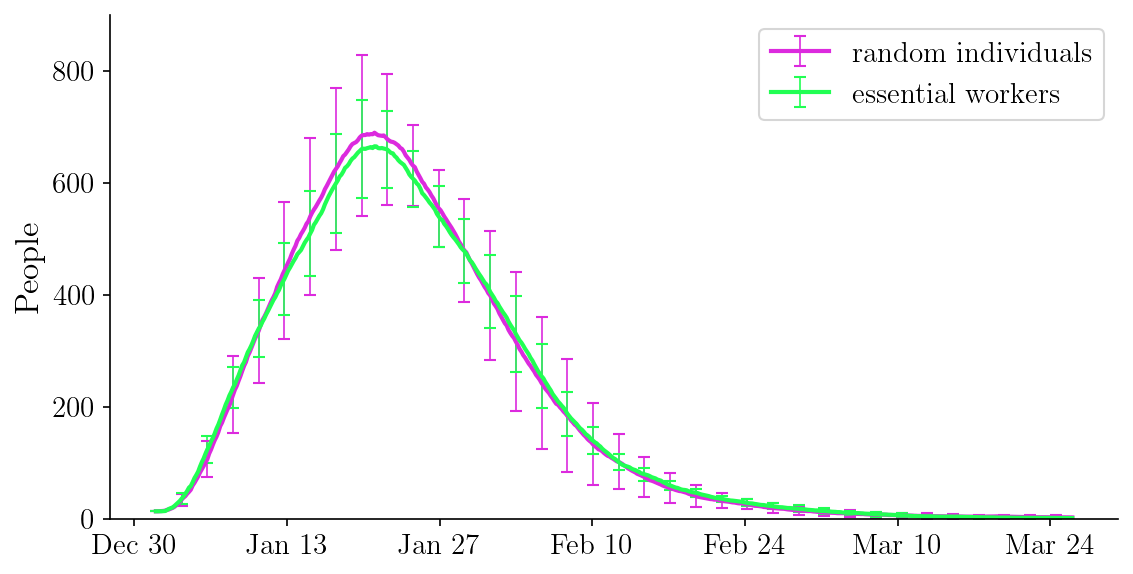

In [12]:
# total population: 2041 , sites: 114
# essential: 987 , non_essential: 1054 , propotion: 0.48358647721705045
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# sites by type: [58, 4, 46, 6]
# essential type: 3
# work site id: [50, 11, 1, 34, 33, 69]
# number of workers at each work site: [149, 187, 147, 153, 178, 173] 987
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 3.6, 5]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 0.64, 5]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type3_prop0.5_sf_settings_75_75.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=900, errorevery=14)

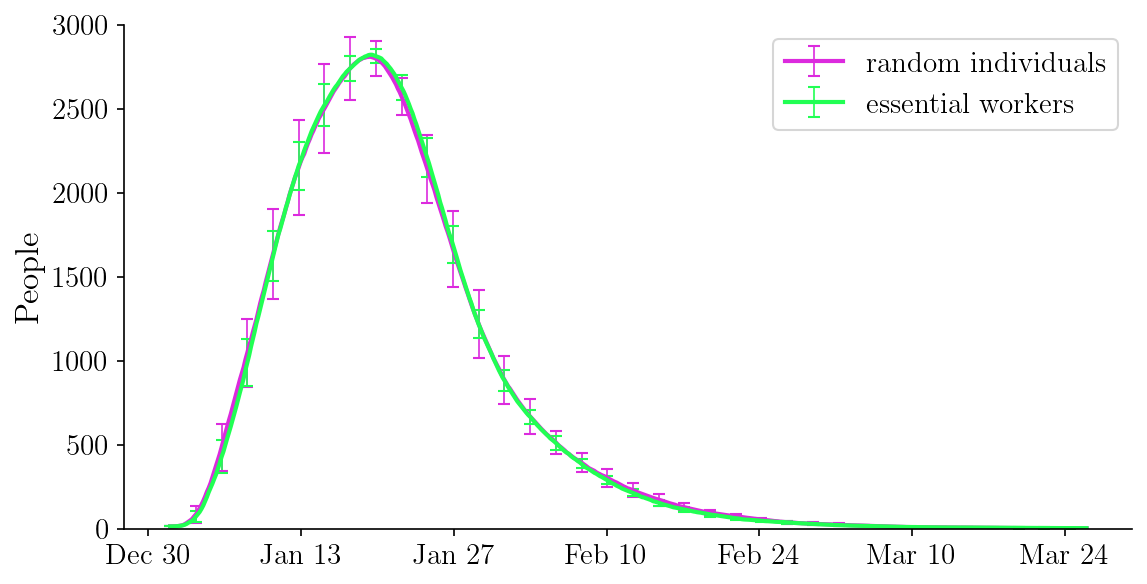

In [18]:
# total population: 5821 , sites: 85
# essential: 2899 , non_essential: 2922 , propotion: 0.4980243944339461
# population by age: [774, 1184, 616, 1051, 6585, 3341, 2730, 724]
# essential prop by age: [0.         0.         0.55194805 0.48525214 0.71009871 0.76324454
#  0.15567766 0.        ]
# sites by type: [45, 1, 33, 6]
# essential type: 3
# work site id: [50, 11, 1, 34, 33, 69]
# number of workers at each work site: [483, 497, 454, 475, 502, 488] 2899
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 3.6, 5]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 0.64, 5]
#                                                           edu, office, social, supermarket
    
summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type3_prop0.5_sf_settings_50_100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

2016.0 500
2016.0 500
2016.0 500
2016.0 500
2016.0 500
2016.0 500
2016.0 500
2016.0 500


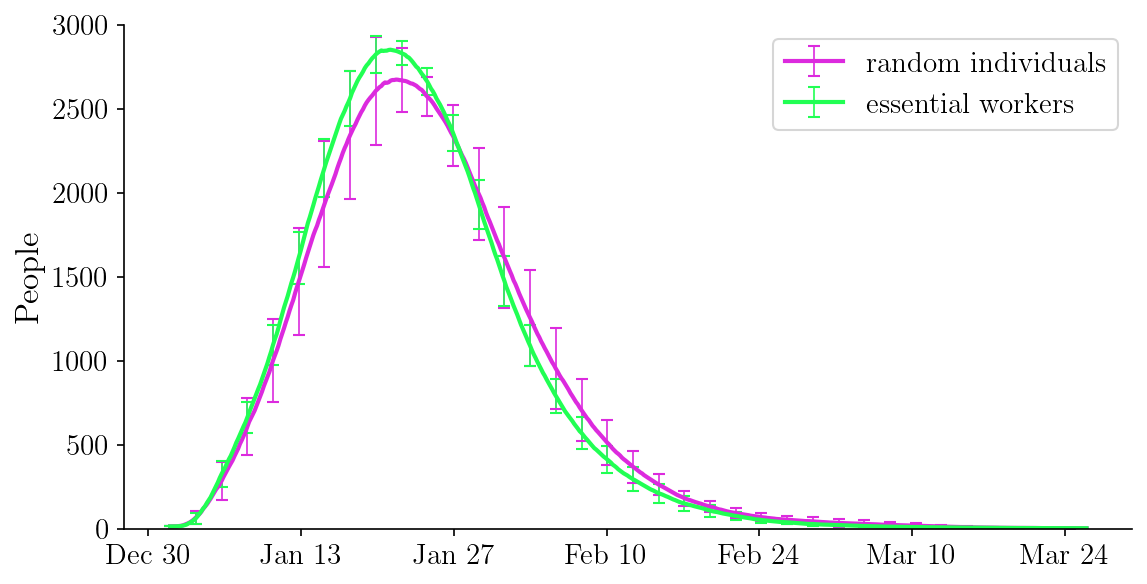

In [30]:
# total population: 5821 , sites: 85
# essential: 2899 , non_essential: 2922 , propotion: 0.4980243944339461
# population by age: [774, 1184, 616, 1051, 6585, 3341, 2730, 724]
# essential prop by age: [0.         0.         0.55194805 0.48525214 0.71009871 0.76324454
#  0.15567766 0.        ]
# sites by type: [45, 1, 33, 6]
# essential type: 2
# work site id: [62, 27, 3, 2, 20, 7, 54, 48, 8, 28, 52, 53, 12, 51, 35, 75, 70, 47, 80, 81, 
#                17, 30, 76, 25, 55, 73, 38, 74, 43, 65, 9, 45, 67]
# number of workers at each work site: [93, 83, 69, 92, 81, 79, 93, 68, 97, 99, 92, 110, 86,
#                                       76, 97, 91, 96, 79, 86, 95, 90, 83, 85, 96, 90, 75, 94, 94, 97, 79, 79, 88, 87] 2899
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 5, 0.27]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 5, 0.4]
#                                                           edu, office, social, supermarket
    
summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_one-comp_essential-type2_prop0.5_sf_settings_50_100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

In [28]:
# total population: 2041 , sites: 114
# essential: 987 , non_essential: 1054 , propotion: 0.48358647721705045
# population by age: [516, 789, 411, 701, 4390, 2227, 1820, 483]
# sites by type: [58, 4, 46, 6]
# essential type: 3
# work site id: [50, 11, 1, 34, 33, 69]
# number of workers at each work site: [149, 187, 147, 153, 178, 173] 987
# regular mob rate: mob_rate_per_age_per_type = [
#       [5,    0,    0,   0],    # 0-14
#       [5,    0,    0,   0],    # 5-14
#       [5,    0,    3.6, 0.22], # 15-19
#       [1.48, 3.52, 3.6, 0.21], # 20-24
#       [0,    5,    3.6, 0.27], # 25-44
#       [0,    5,    3.6, 0.36], # 45-59
#       [0,    0,    3.6, 0.35], # 60-79
#       [0,    0,    3.6, 0.35]] # 80+
# regular dur time: dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]
# essential mob rate essential: essential_mob_rate_per_type = [0.0, 0.0, 3.6, 5]
# essential dur time essential: essential_dur_mean_per_type = [0.0, 0.0, 0.64, 5]
#                                                           edu, office, social, supermarket


summaries_SD_6 = load_summary('sf_comp[1.0]_repeats10_sf_one-comp_essential-type3_prop0.1_ds200.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=900, errorevery=14)

AttributeError: Can't get attribute 'SocialDistancingForPositiveMeasureHousehold' on <module 'lib.measures' from 'C:\\Users\\Weijia Liu\\geo217\\simulator-april_22-essential-server\\sim\\lib\\measures.py'>